In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import mpld3
import time
import fiscalyear
import calendar
import datetime
from datetime import date, timedelta, datetime

In [2]:
df_succursales = pd.read_excel('W:/Notebooks/bd/bd_batiments.xlsx')
df_succursales = df_succursales[df_succursales['longitude']<0.]
df_succursales = df_succursales.set_index('Transit')

In [3]:
df_projets = pd.read_excel('W:/Notebooks/bd/bd_projets.xlsx')
df_projets = df_projets.set_index(['Transit','Annee','ClasseProjet'])
idx = pd.IndexSlice

In [4]:
df_DJ = pd.read_csv('W:/Notebooks/bd/bd_DJ_succursales.csv')
df_DJ = df_DJ.set_index(['transit','annee','mois'])

In [5]:
df_factures_allocation = pd.read_csv('W:/Notebooks/bd/bd_factures_allocation.csv')
df_factures_allocation = df_factures_allocation.set_index(['transit','annee','mois'])

In [6]:
df_mois = pd.concat([df_DJ,df_factures_allocation],axis=1)

df_mois['Consommation_norm_DJ'] = 0.0376*df_mois['DJ_chauff_18'] + \
                                      0.0354*df_mois['DJ_clim_10'] + \
                                      14.68

In [7]:
df_annee = df_mois.groupby(['transit','annee']).sum()

In [8]:
annee = 2017
df_derniere_annee = df_mois.loc[(slice(None),[annee], slice(None)),:]

In [9]:
 df_mois['Consommation_kWh_accumulée'] = df_mois['Consommation_kWh'].cumsum()

df_mois['superficie'] = df_mois['Consommation_kWh']/df_mois['Consommation_kWh_eq_m2']

df_mois['Consommation_kWh_accumulée'] = df_mois['Consommation_kWh'].cumsum()

df_mois['Consommation_norm_kWh_accumulée'] = (df_mois['Consommation_norm_DJ']*df_mois['superficie']).cumsum()

df_mois['Économies'] = (df_mois['Consommation_norm_DJ']*df_mois['superficie']) - df_mois['Consommation_kWh'] 

# PLOTS

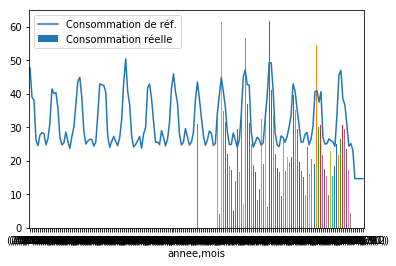

In [10]:
transit = '0038-1'
df_mois.loc[transit]['Consommation_kWh_eq_m2'].plot(kind='bar', label='Consommation réelle')
df_mois.loc[transit]['Consommation_norm_DJ'].plot(label='Consommation de réf.')
plt.legend()

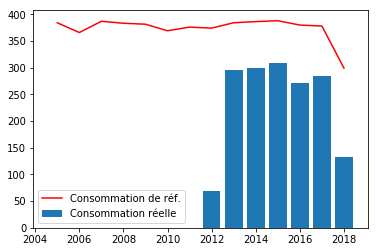

In [11]:
transit = '0038-1'
plt.plot(df_annee.loc[transit]['Consommation_norm_DJ'].index,
        df_annee.loc[transit]['Consommation_norm_DJ'],color='red',label='Consommation de réf.')
plt.bar(df_annee.loc[transit]['Consommation_kWh_eq_m2'].index,
        df_annee.loc[transit]['Consommation_kWh_eq_m2'], label='Consommation réelle')
plt.legend()
plt.show()

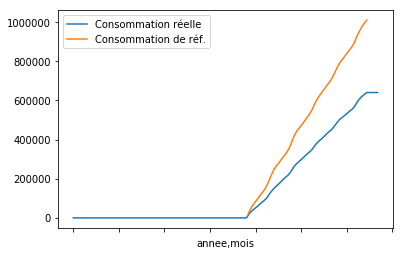

In [12]:
df_mois.loc['0009-1']['Consommation_kWh_accumulée'].plot(label='Consommation réelle')
df_mois.loc['0009-1']['Consommation_norm_kWh_accumulée'].plot(label='Consommation de réf.')
plt.legend()

# Rapports

In [13]:
df_derniere_annee['Surconsommation'] = df_derniere_annee['Consommation_kWh_eq_m2'] - df_derniere_annee['Consommation_norm_DJ'] 

mask = df_derniere_annee['Surconsommation'] > 0.

df_derniere_annee[mask].sort_values(by=[('annee'),'Surconsommation'], ascending=False)

df_derniere_annee[mask].reset_index().groupby('transit')['mois'].nunique().sort_values(ascending=False)

mask_mois = df_derniere_annee[mask].reset_index().groupby('transit')['mois'].nunique().sort_values(ascending=False)>3
list_Surconso_transit = df_derniere_annee[mask].reset_index().groupby('transit')['mois'].nunique().sort_values(ascending=False)[mask_mois].index
list_Surconso_nbmois = df_derniere_annee[mask].reset_index().groupby('transit')['mois'].nunique().sort_values(ascending=False)[mask_mois].values
list_Surconso = list(zip(list_Surconso_transit,list_Surconso_nbmois))

C:\Users\EMaracaja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Transit:  1231-1
Nb. mois Surconsommation: 12
Superficie (m2):  261.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object


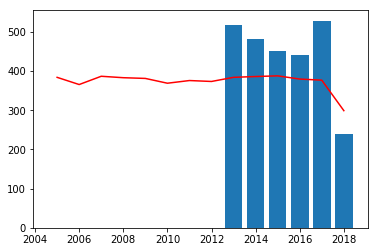

Transit:  1155-1
Nb. mois Surconsommation: 11
Superficie (m2):  646.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


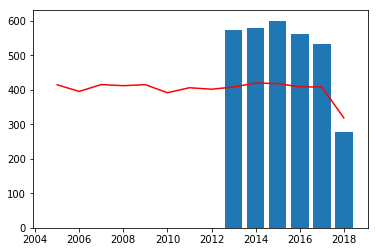

Transit:  0201-1
Nb. mois Surconsommation: 8
Superficie (m2):  223.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Reloc nouv. bât.
2018   Mineur               Réaménagement mineur
Name: TypeProjet, dtype: object


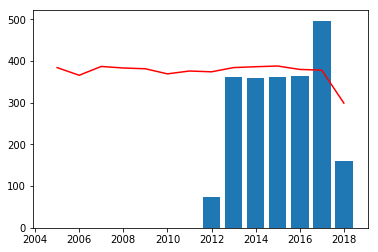

Transit:  0383-1
Nb. mois Surconsommation: 7
Superficie (m2):  149.0
Télégestion:  0
Projet: 
0 projet


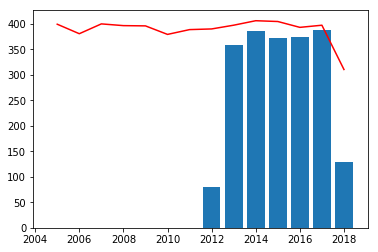

Transit:  0395-1
Nb. mois Surconsommation: 7
Superficie (m2):  385.0
Télégestion:  0
Projet: 
0 projet


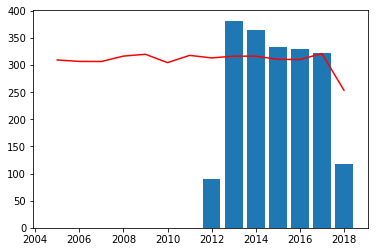

Transit:  1449-1
Nb. mois Surconsommation: 7
Superficie (m2):  153.0
Télégestion:  0
Projet: 
0 projet


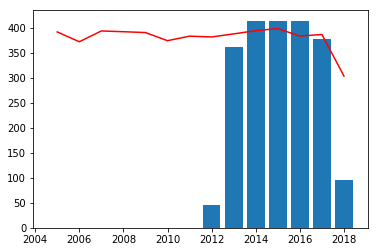

Transit:  0773-1
Nb. mois Surconsommation: 7
Superficie (m2):  323.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


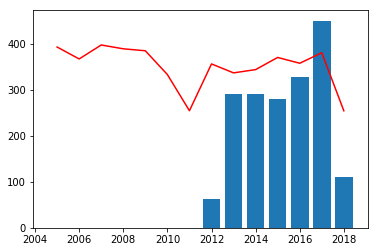

Transit:  0775-1
Nb. mois Surconsommation: 6
Superficie (m2):  381.0
Télégestion:  0
Projet: 
0 projet


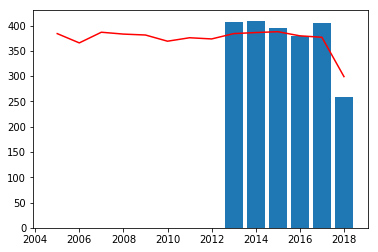

Transit:  0639-1
Nb. mois Surconsommation: 6
Superficie (m2):  312.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2017   Mineur          Diagnostic CVCA
Name: TypeProjet, dtype: object


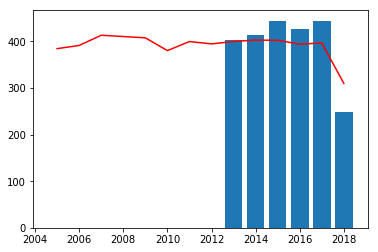

Transit:  0230-1
Nb. mois Surconsommation: 6
Superficie (m2):  267.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2013   Mineur          Correctifs CVCA
Name: TypeProjet, dtype: object


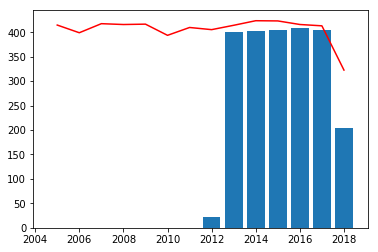

Transit:  0524-1
Nb. mois Surconsommation: 6
Superficie (m2):  173.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2012   Mineur          Conversion électrique
Name: TypeProjet, dtype: object


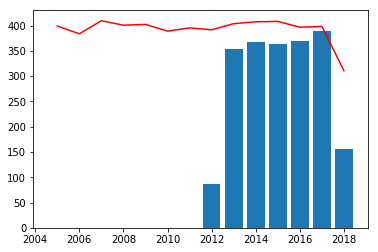

Transit:  1327-1
Nb. mois Surconsommation: 6
Superficie (m2):  262.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2011   Mineur              Contrôles et biomasse
2016   Majeur          Majeur - Reloc nouv. bât.
       Mineur                     Projet spécial
Name: TypeProjet, dtype: object


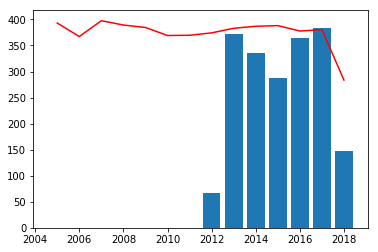

Transit:  0637-1
Nb. mois Surconsommation: 6
Superficie (m2):  204.0
Télégestion:  0
Projet: 
0 projet


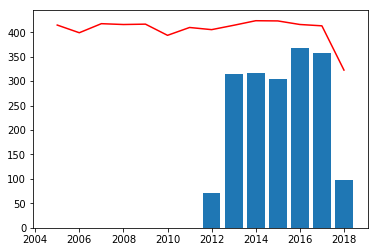

Transit:  0620-1
Nb. mois Surconsommation: 6
Superficie (m2):  201.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2016   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


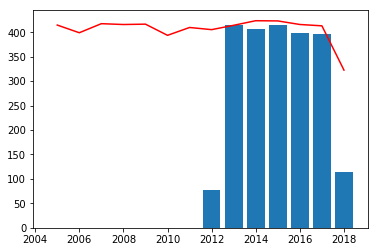

Transit:  1447-1
Nb. mois Surconsommation: 6
Superficie (m2):  130.0
Télégestion:  0
Projet: 
0 projet


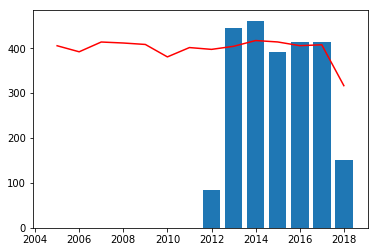

Transit:  1455-1
Nb. mois Surconsommation: 6
Superficie (m2):  84.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2009   Mineur          Modernisation éclairage
Name: TypeProjet, dtype: object


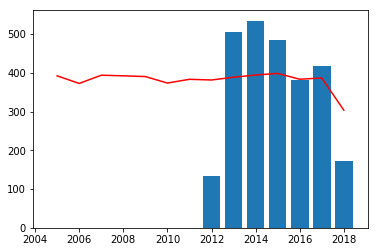

Transit:  1152-1
Nb. mois Surconsommation: 5
Superficie (m2):  330.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2014   Mineur          Remplacement équip. CVCA
2015   Mineur                Améliorations CVCA
2017   Mineur                         Expertise
Name: TypeProjet, dtype: object


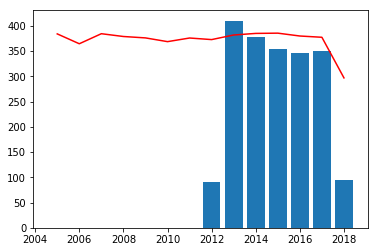

Transit:  1331-1
Nb. mois Surconsommation: 5
Superficie (m2):  272.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


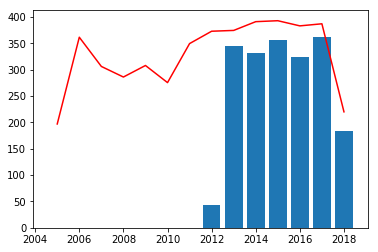

Transit:  0443-2
Nb. mois Surconsommation: 5
Superficie (m2):  47.0
Télégestion:  0
Projet: 
0 projet


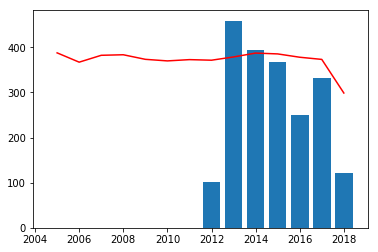

Transit:  0049-1
Nb. mois Surconsommation: 5
Superficie (m2):  530.0
Télégestion:  0
Projet: 
0 projet


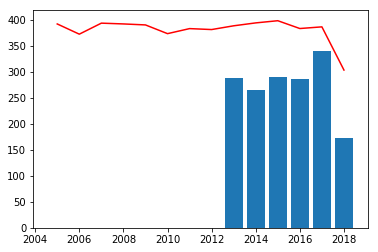

Transit:  1025-1
Nb. mois Surconsommation: 5
Superficie (m2):  798.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2014   Mineur          Conv. contrôles et éclair.
Name: TypeProjet, dtype: object


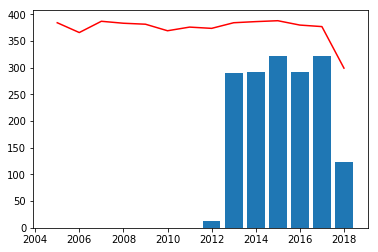

Transit:  0259-1
Nb. mois Surconsommation: 5
Superficie (m2):  316.0
Télégestion:  0
Projet: 
Annee  ClasseProjet
2007   Mineur             Mise à niveau de contrôles
2015   Mineur          Optimisation contrôles exist.
Name: TypeProjet, dtype: object


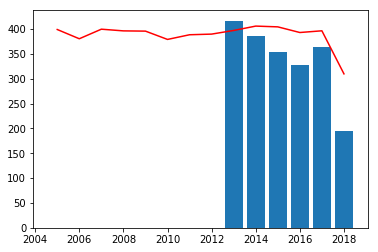

Transit:  0761-1
Nb. mois Surconsommation: 4
Superficie (m2):  80.0
Télégestion:  0
Projet: 
0 projet


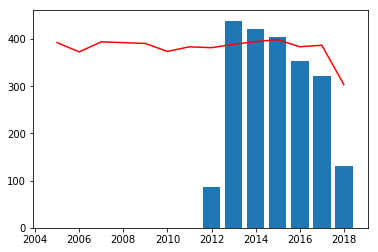

Transit:  0529-1
Nb. mois Surconsommation: 4
Superficie (m2):  223.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2012   Mineur          Conversion électrique
Name: TypeProjet, dtype: object


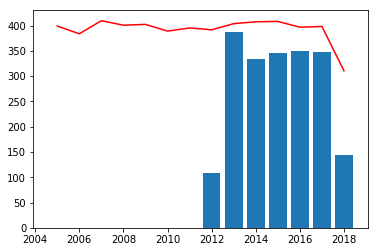

Transit:  0024-1
Nb. mois Surconsommation: 4
Superficie (m2):  313.0
Télégestion:  0
Projet: 
0 projet


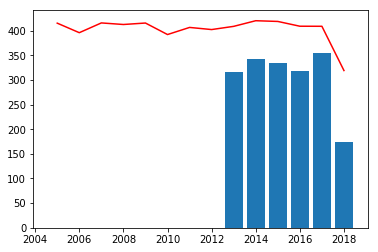

Transit:  1480-1
Nb. mois Surconsommation: 4
Superficie (m2):  275.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2014   Mineur          Conv. contrôles et éclair.
       Mineur             Conversion de contrôles
Name: TypeProjet, dtype: object


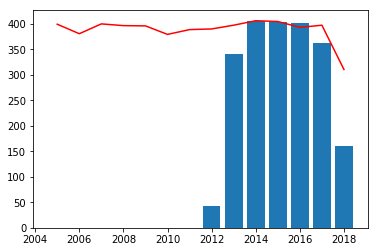

Transit:  1307-1
Nb. mois Surconsommation: 4
Superficie (m2):  334.0
Télégestion:  0
Projet: 
0 projet


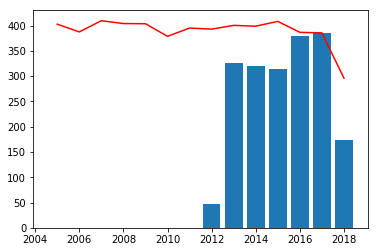

Transit:  1098-1
Nb. mois Surconsommation: 4
Superficie (m2):  480.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conversion de contrôles
Name: TypeProjet, dtype: object


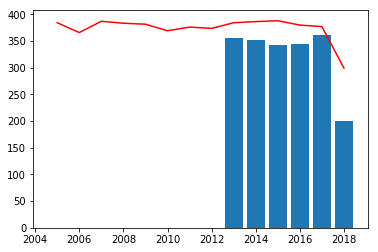

Transit:  1450-1
Nb. mois Surconsommation: 4
Superficie (m2):  124.0
Télégestion:  0
Projet: 
0 projet


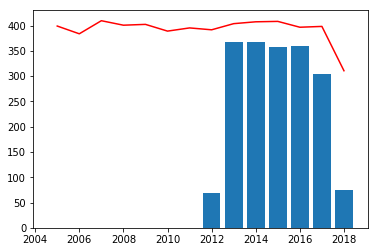

Transit:  0442-1
Nb. mois Surconsommation: 4
Superficie (m2):  271.0
Télégestion:  1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conversion de contrôles
2012   Mineur                Intégration Delta
Name: TypeProjet, dtype: object


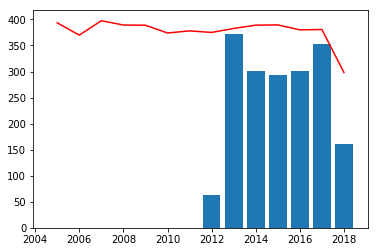

In [14]:
#transit = '1449-1'
for transit,nbmois in list_Surconso:
    print('Transit: ',transit)
    print('Nb. mois Surconsommation:',nbmois)
    print('Superficie (m2): ',df_succursales.loc[transit]['superficie_m2'])
    print('Télégestion: ',df_succursales.loc[transit]['Télégestion'])
    print('Projet: ')
    try:
        print(df_projets.loc[transit]['TypeProjet'])
    except:
        print('0 projet')
    plt.plot(df_annee.loc[transit]['Consommation_norm_DJ'].index,
        df_annee.loc[transit]['Consommation_norm_DJ'],color='red')
    plt.bar(df_annee.loc[transit]['Consommation_kWh_eq_m2'].index,
        df_annee.loc[transit]['Consommation_kWh_eq_m2'])
    plt.show()

Transit:  13-B-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Projet spécial
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1015-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1187-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réfection CVCA et contrôles
2017   Majeur                   Majeur - Réduction
Name: TypeProjet, dtype: object


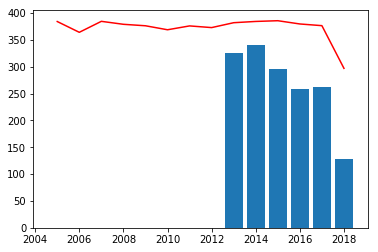

-------------------
Transit:  0154-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conv. contrôles et éclair.
2011   Mineur                      Agrandissement
2015   Mineur                  Améliorations CVCA
Name: TypeProjet, dtype: object


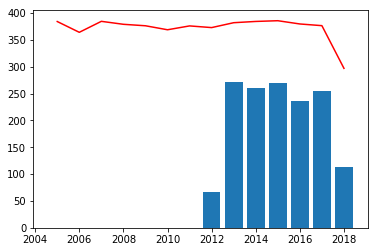

-------------------
Transit:  0259-1
Projet: 
Annee  ClasseProjet
2007   Mineur             Mise à niveau de contrôles
2015   Mineur          Optimisation contrôles exist.
Name: TypeProjet, dtype: object


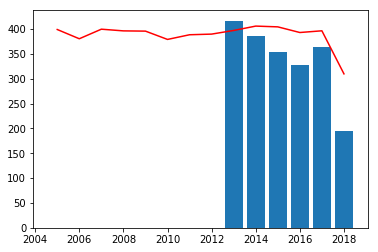

-------------------
Transit:  0464-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conv. contrôles et éclair.
2010   Mineur                      Agrandissement
2015   Mineur                  Améliorations CVCA
Name: TypeProjet, dtype: object


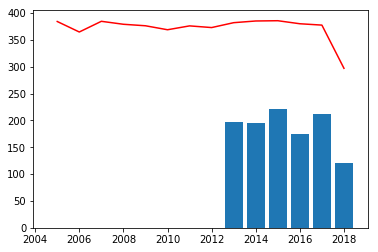

-------------------
Transit:  0014-1
Projet: 
Annee  ClasseProjet
2008   Mineur           Conversion de contrôles
2015   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


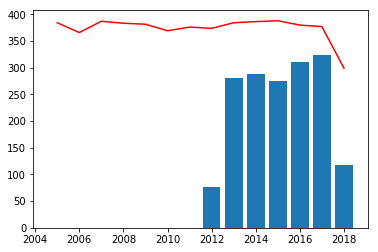

-------------------
Transit:  6599-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1314-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Majeur - Reloc nouv. bât.
2015   Mineur                 Améliorations CVCA
Name: TypeProjet, dtype: object


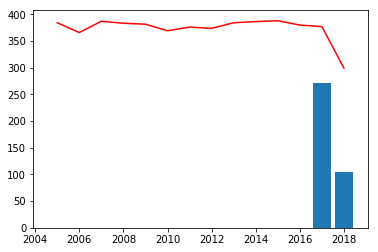

-------------------
Transit:  1026-1
Projet: 
Annee  ClasseProjet
2010   Mineur           Intégration Distech
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


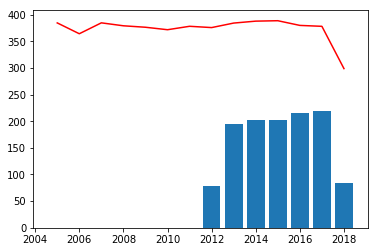

-------------------
Transit:  0412-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réfection CVCA et contrôles
Name: TypeProjet, dtype: object


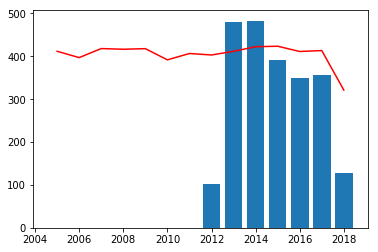

-------------------
Transit:  1029-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conv. contrôles et éclair.
2015   Mineur                Réaménagement mineur
Name: TypeProjet, dtype: object


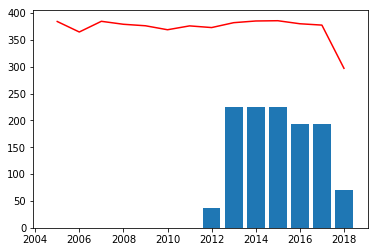

-------------------
Transit:  9159-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  0461-1
Projet: 
Annee  ClasseProjet
2011   Majeur              Relocalisation
2015   Mineur          Améliorations CVCA
2018   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


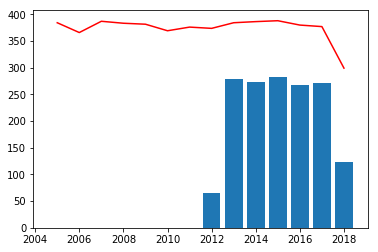

-------------------
Transit:  1237-1
Projet: 
Annee  ClasseProjet
2014   Majeur                Relocalisation
       Majeur              Cx projet majeur
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


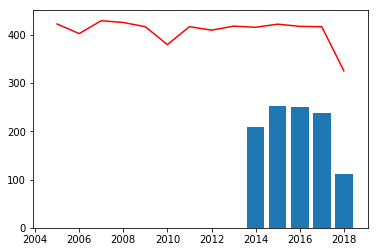

-------------------
Transit:  1108-1
Projet: 
Annee  ClasseProjet
2016   Majeur            Majeur - Réaménagement
2015   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


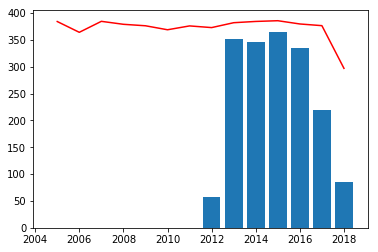

-------------------
Transit:  0107-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Chaufferie et éclairage
2014   Mineur          Modernisation éclairage
2015   Mineur          Conversion de contrôles
2014   Mineur               Améliorations CVCA
Name: TypeProjet, dtype: object


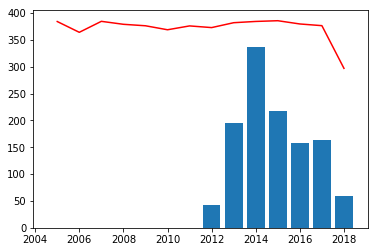

-------------------
Transit:  1178-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


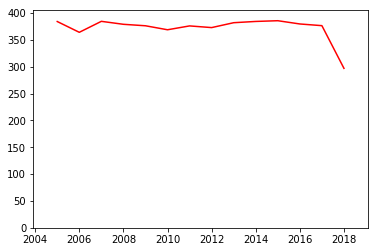

-------------------
Transit:  0159-1
Projet: 
Annee  ClasseProjet
2010   Mineur          Étanchéité et chaufferie
2012   Mineur           Réfection CVCA et Ctrls
2017   Majeur                Majeur - Réduction
2015   Mineur                Améliorations CVCA
Name: TypeProjet, dtype: object


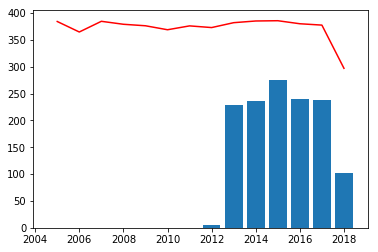

-------------------
Transit:  0466-1
Projet: 
Annee  ClasseProjet
2012   Mineur             Conversion électrique
2010   Majeur                     Réaménagement
2015   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


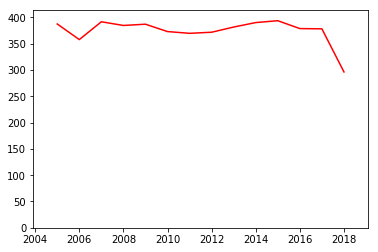

-------------------
Transit:  0772-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conv. contrôles et éclair.
2015   Mineur            Remplacement équip. CVCA
2016   Mineur                      Projet spécial
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1166-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Optimisation contrôles exist.
2017   Majeur                 Majeur - Réaménagement
Name: TypeProjet, dtype: object


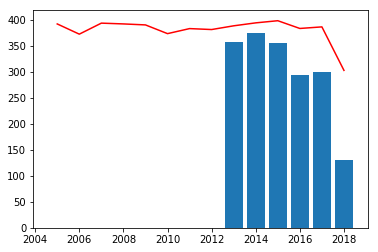

-------------------
Transit:  0200-1
Projet: 
Annee  ClasseProjet
2007   Mineur           Conversion de contrôles
2015   Mineur          Remplacement équip. CVCA
2018   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


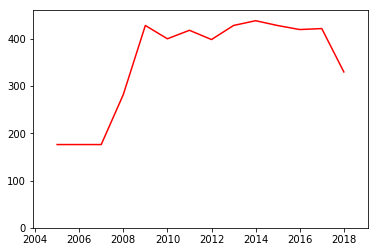

-------------------
Transit:  0070-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


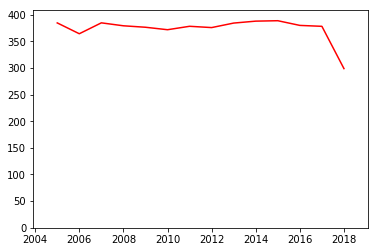

-------------------
Transit:  0173-1
Projet: 
Annee  ClasseProjet
2009   Mineur          Conversion de contrôles
2015   Mineur               Améliorations CVCA
2018   Mineur                  Diagnostic CVCA
Name: TypeProjet, dtype: object


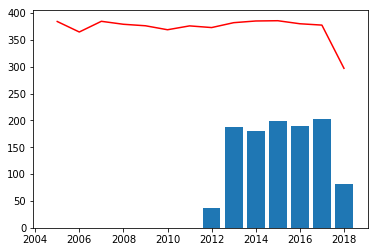

-------------------
Transit:  1421-1
Projet: 
Annee  ClasseProjet
2013   Majeur              Relocalisation
2015   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


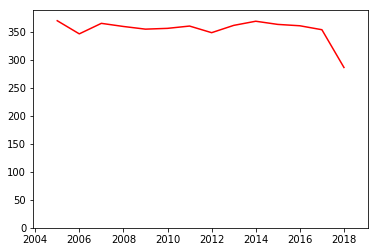

-------------------
Transit:  0223-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Diagnostic énergétique
Name: TypeProjet, dtype: object


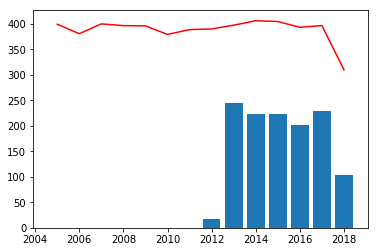

-------------------
Transit:  1228-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


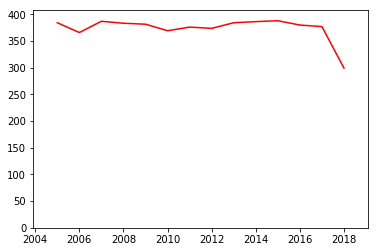

-------------------
Transit:  0687-1
Projet: 
Annee  ClasseProjet
2015   Mineur           Réfection CVCA et Ctrls
       Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


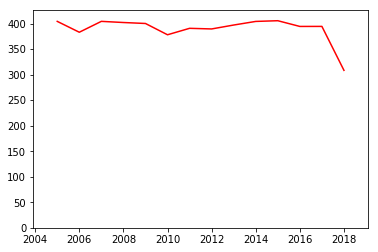

-------------------
Transit:  1315-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


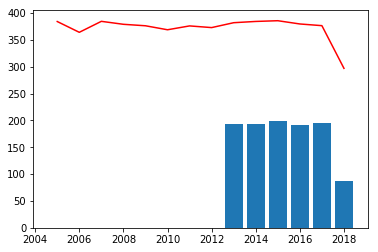

-------------------
Transit:  1283-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


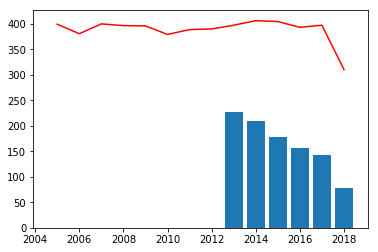

-------------------
Transit:  1152-1
Projet: 
Annee  ClasseProjet
2014   Mineur          Remplacement équip. CVCA
2015   Mineur                Améliorations CVCA
2017   Mineur                         Expertise
Name: TypeProjet, dtype: object


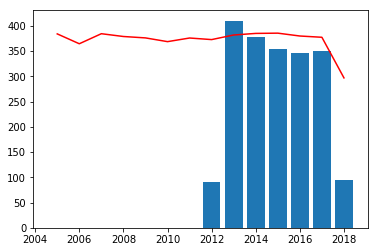

-------------------
Transit:  1133-1
Projet: 
Annee  ClasseProjet
2015   Mineur            Améliorations CVCA
       Mineur          Réaménagement mineur
2016   Mineur            Améliorations CVCA
Name: TypeProjet, dtype: object


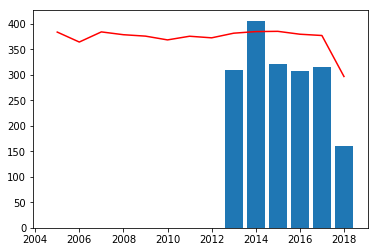

-------------------
Transit:  1041-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Mise à niveau de contrôles
2015   Mineur             Conversion de contrôles
Name: TypeProjet, dtype: object


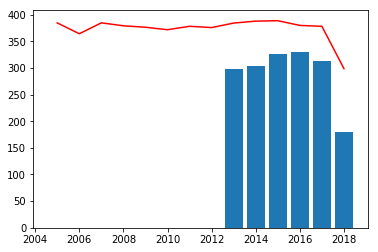

-------------------
Transit:  12-B-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Projet spécial
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1013-1
Projet: 
Annee  ClasseProjet
2015   Mineur           Conversion de contrôles
2017   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


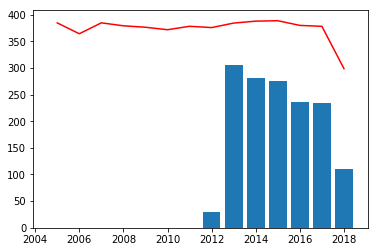

-------------------
Transit:  1169-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conv. contrôles et éclair.
2017   Mineur                  Améliorations CVCA
2015   Mineur                Réaménagement mineur
Name: TypeProjet, dtype: object


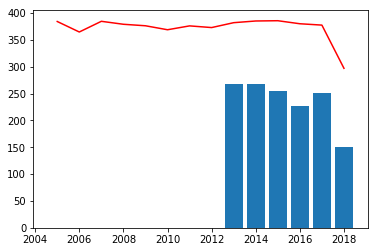

-------------------
Transit:  2341-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Expertise
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  0171-1
Projet: 
Annee  ClasseProjet
2014   Mineur                     Expertise
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


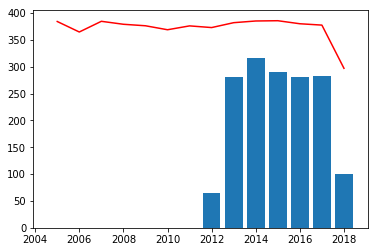

-------------------
Transit:  1188-1
Projet: 
Annee  ClasseProjet
2013   Majeur              Relocalisation
2015   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


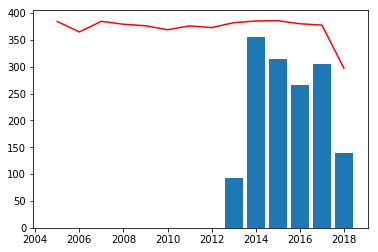

-------------------
Transit:  0047-1
Projet: 
Annee  ClasseProjet
2008   Mineur             Intégration Delta
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


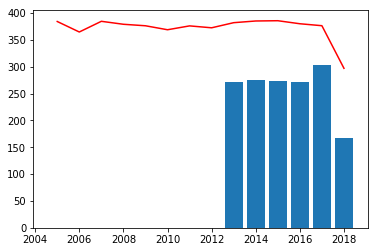

-------------------


In [16]:
listMajeurs = df_projets.xs('Majeur', level=2).index
listMineurs = df_projets.xs('Mineur', level=2).xs(2015, level=1).index
for i in listMajeurs:
    if i in listMineurs:
        listMineurs.remove(i)
        
for transit in set(listMineurs):
    print('Transit: ',transit)
    #print('Superficie (m2): ',df_succursales.loc[transit]['superficie_m2'])
    print('Projet: ')
    try:
        print(df_projets.loc[transit]['TypeProjet'])
        plt.plot(df_annee.loc[transit]['Consommation_norm_DJ'].index,
        df_annee.loc[transit]['Consommation_norm_DJ'],color='red')
        plt.bar(df_annee.loc[transit]['Consommation_kWh_eq_m2'].index,
        df_annee.loc[transit]['Consommation_kWh_eq_m2'])
        plt.show()
        print('-------------------')
    except:
        print('Pas de factures')
        print('-------------------')

Transit:  0759-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


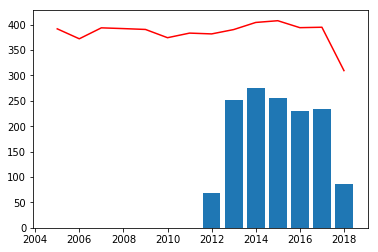

-------------------
Transit:  0098-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Réaménagement
Name: TypeProjet, dtype: object


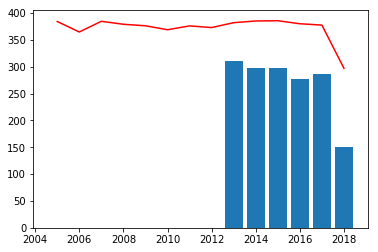

-------------------
Transit:  0120-1
Projet: 
Annee  ClasseProjet
2010   Mineur             RCx Distech
2007   Majeur          Relocalisation
Name: TypeProjet, dtype: object


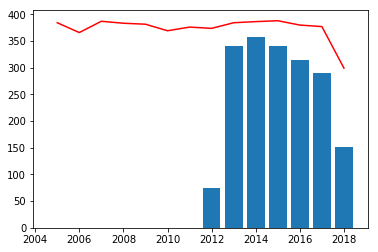

-------------------
Transit:  0205-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Réaménagement
Name: TypeProjet, dtype: object


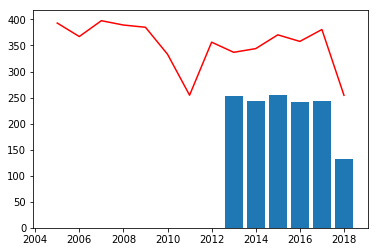

-------------------
Transit:  0284-1
Projet: 
Annee  ClasseProjet
2007   Majeur                    Réaménagement
2017   Mineur          Améliorations contrôles
Name: TypeProjet, dtype: object


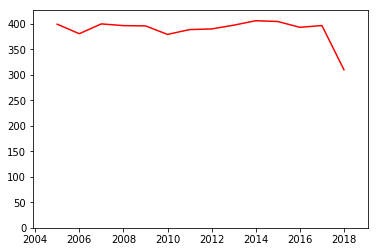

-------------------
Transit:  0401-1
Projet: 
Annee  ClasseProjet
2012   Mineur              RCx allégé
2007   Majeur          Relocalisation
2012   Mineur          Agrandissement
Name: TypeProjet, dtype: object


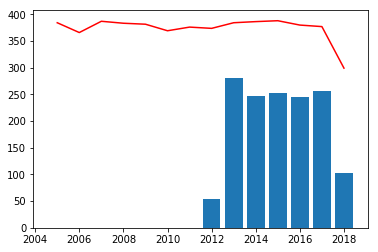

-------------------
Transit:  0499-1
Projet: 
Annee  ClasseProjet
2010   Mineur             RCx Distech
2007   Majeur          Relocalisation
Name: TypeProjet, dtype: object


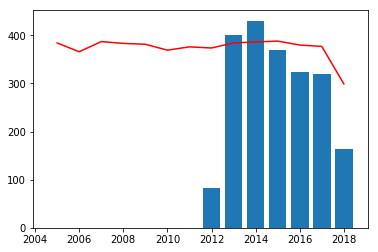

-------------------
Transit:  0601-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Relocalisation
Name: TypeProjet, dtype: object


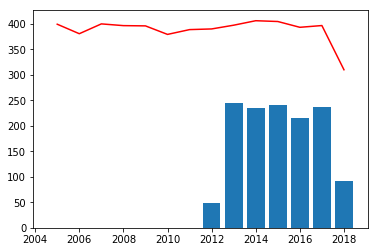

-------------------
Transit:  0673-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Réaménagement
Name: TypeProjet, dtype: object


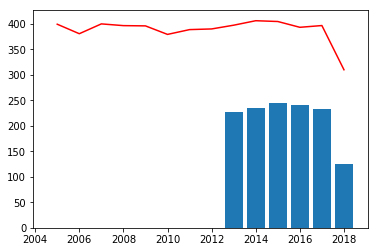

-------------------
Transit:  1126-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Relocalisation
Name: TypeProjet, dtype: object


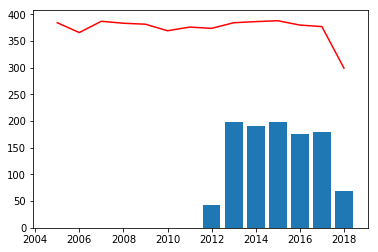

-------------------
Transit:  1170-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Réaménagement
Name: TypeProjet, dtype: object


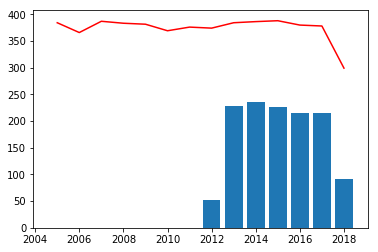

-------------------
Transit:  1253-1
Projet: 
Annee  ClasseProjet
2012   Mineur              RCx allégé
2007   Majeur          Relocalisation
Name: TypeProjet, dtype: object


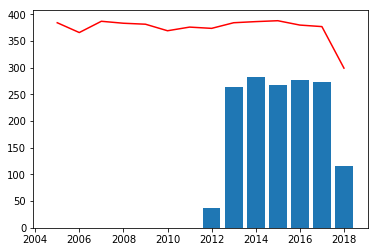

-------------------
Transit:  1360-1
Projet: 
Annee  ClasseProjet
2007   Majeur          Relocalisation
2011   Mineur          Agrandissement
Name: TypeProjet, dtype: object


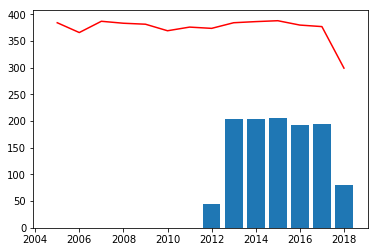

-------------------
Transit:  0030-1
Projet: 
Annee  ClasseProjet
2010   Mineur                  RCx Distech
2008   Majeur          Nouvelle succursale
2012   Majeur               Relocalisation
Name: TypeProjet, dtype: object


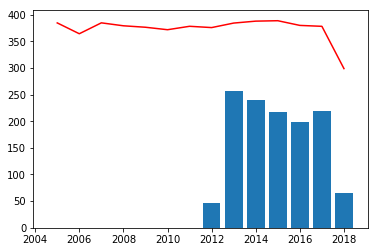

-------------------
Transit:  0403-1
Projet: 
Annee  ClasseProjet
2008   Majeur              Relocalisation
2016   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


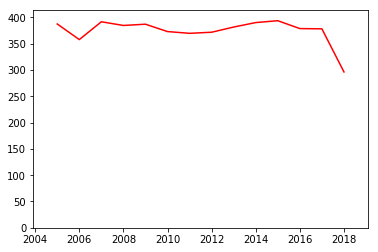

-------------------
Transit:  0433-1
Projet: 
Annee  ClasseProjet
2008   Majeur          Réaménagement
Name: TypeProjet, dtype: object


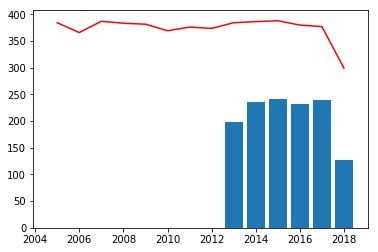

-------------------
Transit:  0472-1
Projet: 
Annee  ClasseProjet
2008   Majeur          Réaménagement
Name: TypeProjet, dtype: object


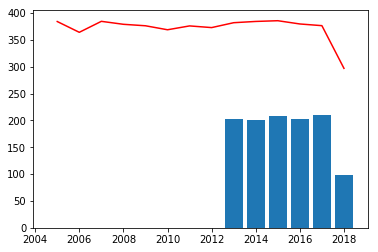

-------------------
Transit:  0641-1
Projet: 
Annee  ClasseProjet
2008   Majeur          Relocalisation
Name: TypeProjet, dtype: object


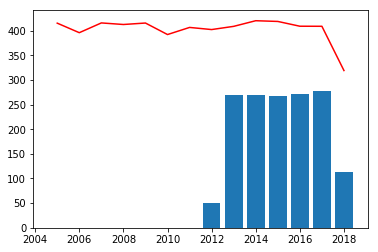

-------------------
Transit:  1340-1
Projet: 
Annee  ClasseProjet
2008   Majeur          Relocalisation
Name: TypeProjet, dtype: object


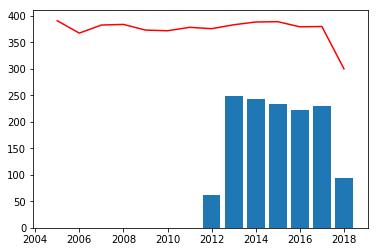

-------------------
Transit:  1374-1
Projet: 
Annee  ClasseProjet
2008   Majeur          Relocalisation
Name: TypeProjet, dtype: object


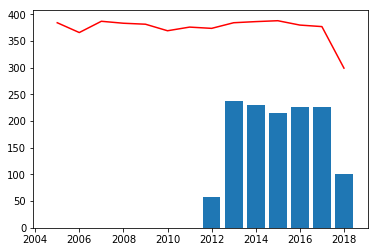

-------------------
Transit:  0038-1
Projet: 
Annee  ClasseProjet
2010   Mineur             RCx Distech
2009   Majeur          Relocalisation
Name: TypeProjet, dtype: object


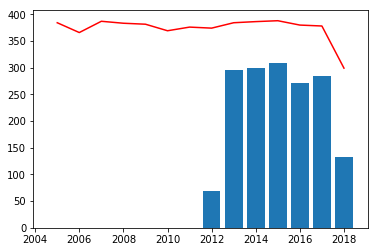

-------------------
Transit:  0065-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Relocalisation
Name: TypeProjet, dtype: object


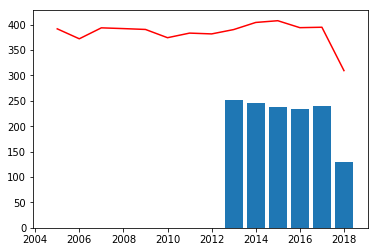

-------------------
Transit:  0066-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conv. contrôles et éclair.
2010   Mineur                         RCx Distech
2009   Majeur                       Réaménagement
Name: TypeProjet, dtype: object


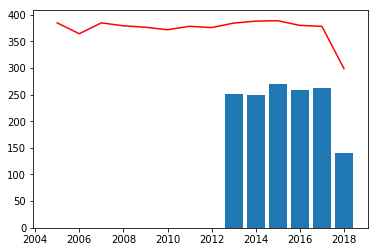

-------------------
Transit:  0130-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conversion de contrôles
2009   Majeur                    Réaménagement
Name: TypeProjet, dtype: object


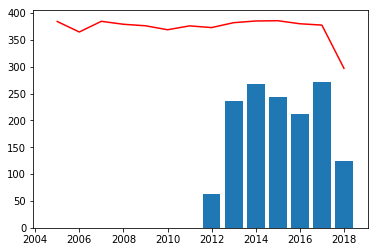

-------------------
Transit:  0181-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Réaménagement
Name: TypeProjet, dtype: object


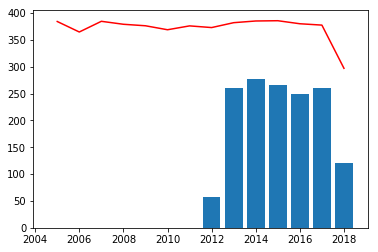

-------------------
Transit:  0271-1
Projet: 
Annee  ClasseProjet
2010   Mineur             RCx Distech
2009   Majeur          Relocalisation
Name: TypeProjet, dtype: object


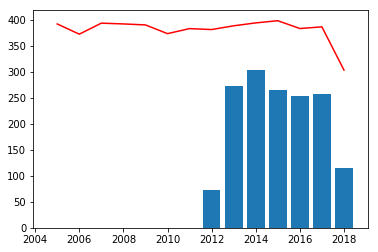

-------------------
Transit:  0415-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Réaménagement
Name: TypeProjet, dtype: object


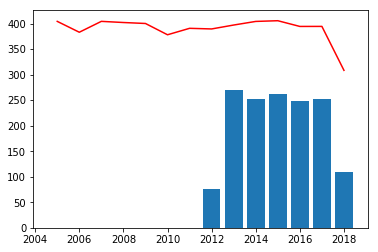

-------------------
Transit:  0427-1
Projet: 
Annee  ClasseProjet
2012   Mineur            RCx complet
2009   Majeur          Réaménagement
Name: TypeProjet, dtype: object


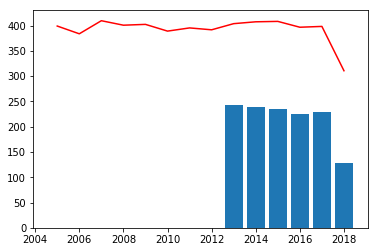

-------------------
Transit:  0429-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Réaménagement
Name: TypeProjet, dtype: object


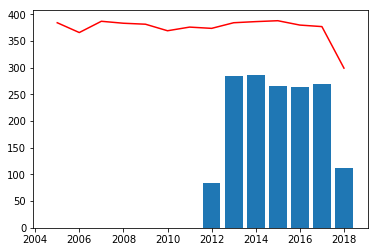

-------------------
Transit:  0450-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Relocalisation
Name: TypeProjet, dtype: object


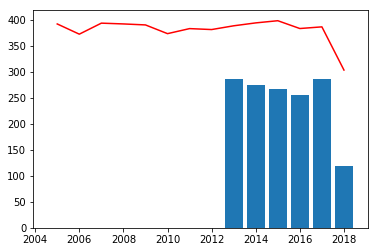

-------------------
Transit:  0635-1
Projet: 
Annee  ClasseProjet
2009   Majeur                   Relocalisation
2014   Mineur               Améliorations CVCA
2016   Mineur          Améliorations contrôles
Name: TypeProjet, dtype: object


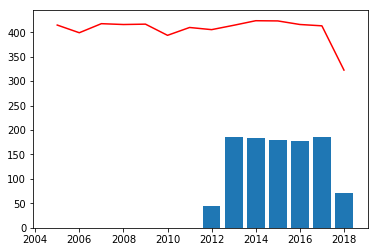

-------------------
Transit:  0777-1
Projet: 
Annee  ClasseProjet
2009   Majeur           Réaménagement
2017   Mineur          Projet spécial
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1027-1
Projet: 
Annee  ClasseProjet
2009   Majeur              Relocalisation
2016   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


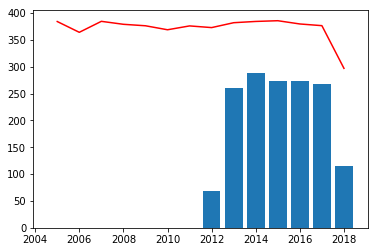

-------------------
Transit:  1085-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conv. contrôles et éclair.
2010   Mineur                         RCx Distech
2009   Majeur                       Réaménagement
Name: TypeProjet, dtype: object


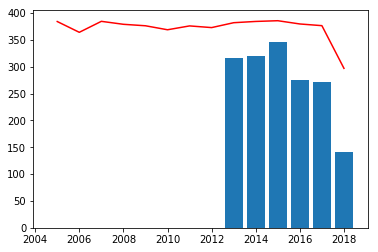

-------------------
Transit:  1091-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Relocalisation
Name: TypeProjet, dtype: object


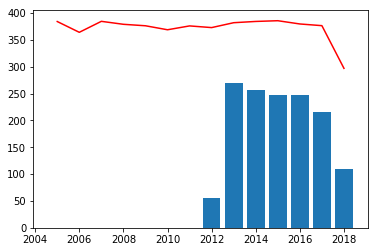

-------------------
Transit:  1211-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Réaménagement
Name: TypeProjet, dtype: object


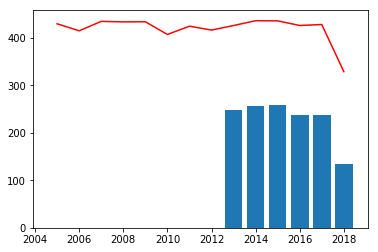

-------------------
Transit:  1286-1
Projet: 
Annee  ClasseProjet
2009   Majeur          Réaménagement
Name: TypeProjet, dtype: object


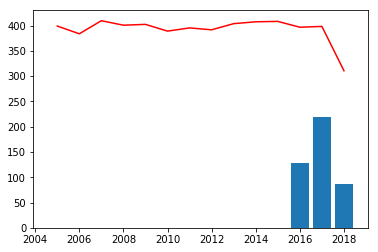

-------------------
Transit:  0110-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conversion de contrôles
2010   Majeur                   Relocalisation
Name: TypeProjet, dtype: object


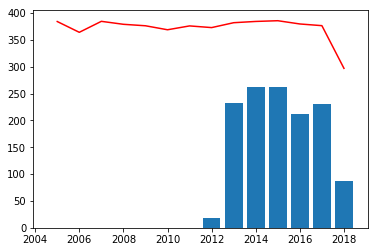

-------------------
Transit:  0158-1
Projet: 
Annee  ClasseProjet
2012   Mineur              RCx allégé
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


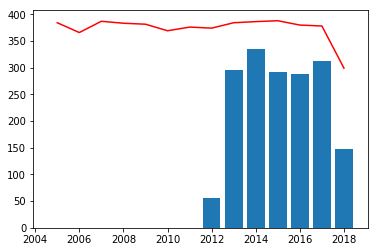

-------------------
Transit:  0241-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


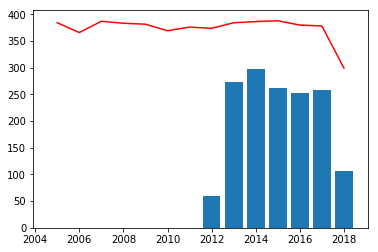

-------------------
Transit:  0244-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conv. contrôles et éclair.
2013   Mineur                          RCx allégé
2010   Majeur                      Relocalisation
Name: TypeProjet, dtype: object


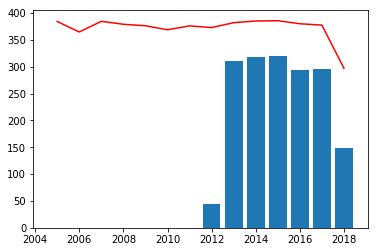

-------------------
Transit:  0255-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


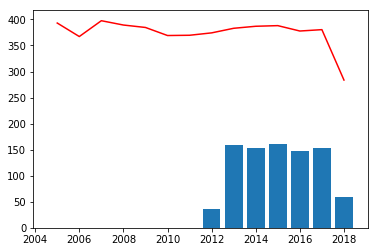

-------------------
Transit:  0262-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


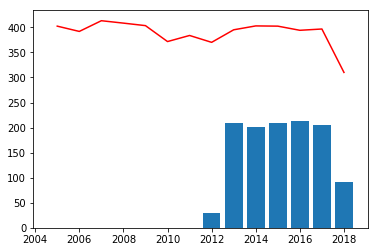

-------------------
Transit:  0298-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


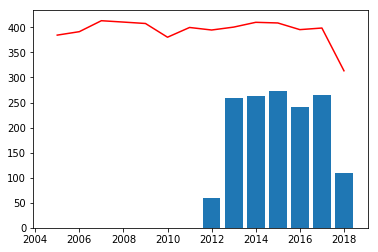

-------------------
Transit:  0421-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


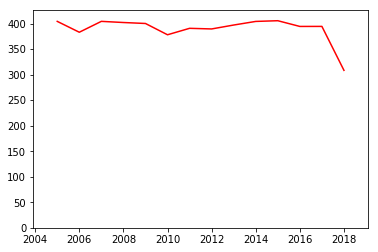

-------------------
Transit:  0466-1
Projet: 
Annee  ClasseProjet
2012   Mineur             Conversion électrique
2010   Majeur                     Réaménagement
2015   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


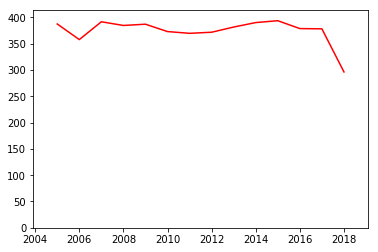

-------------------
Transit:  0544-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


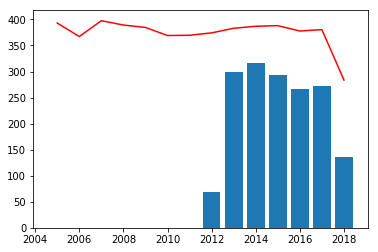

-------------------
Transit:  0609-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Réaménagement
Name: TypeProjet, dtype: object


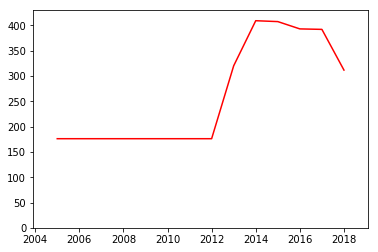

-------------------
Transit:  0773-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


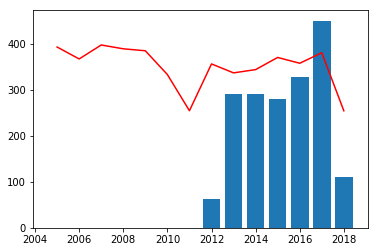

-------------------
Transit:  1092-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Réaménagement
Name: TypeProjet, dtype: object


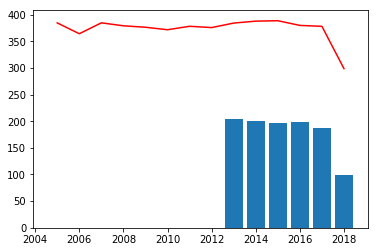

-------------------
Transit:  1160-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


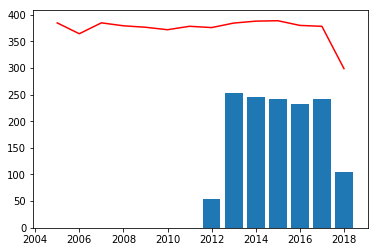

-------------------
Transit:  1197-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Réaménagement
Name: TypeProjet, dtype: object


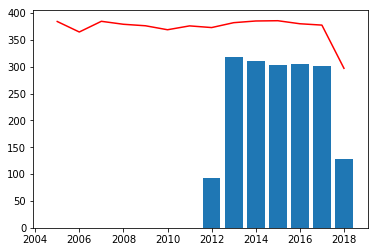

-------------------
Transit:  1351-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


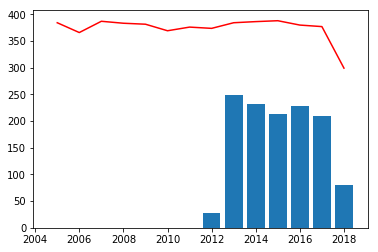

-------------------
Transit:  1352-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Relocalisation
Name: TypeProjet, dtype: object


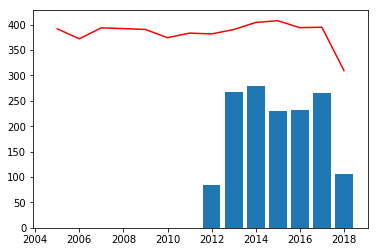

-------------------
Transit:  1379-1
Projet: 
Annee  ClasseProjet
2010   Majeur              Relocalisation
2017   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


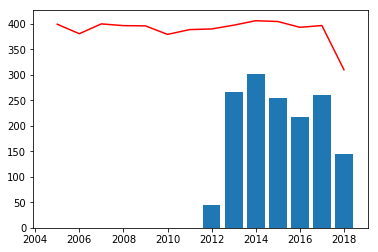

-------------------
Transit:  1453-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


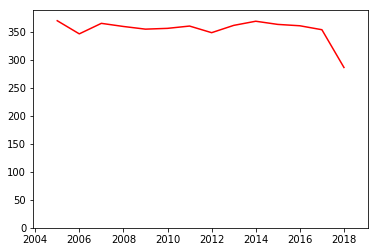

-------------------
Transit:  1460-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Réaménagement
Name: TypeProjet, dtype: object


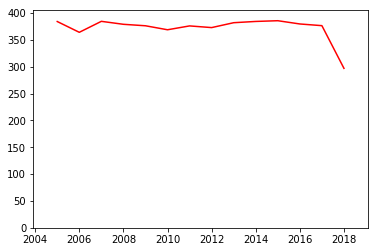

-------------------
Transit:  1492-1
Projet: 
Annee  ClasseProjet
2010   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


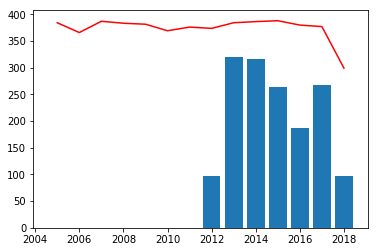

-------------------
Transit:  0028-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
2016   Mineur               Expertise
Name: TypeProjet, dtype: object


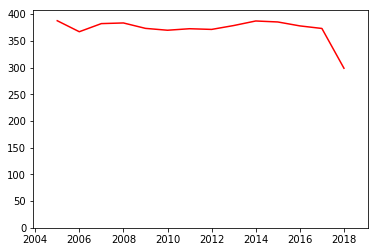

-------------------
Transit:  0150-1
Projet: 
Annee  ClasseProjet
2009   Mineur          Conversion de contrôles
2011   Majeur                    Réaménagement
Name: TypeProjet, dtype: object


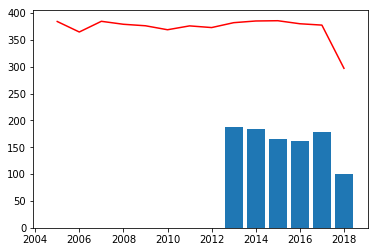

-------------------
Transit:  0177-1
Projet: 
Annee  ClasseProjet
2013   Mineur                  RCx allégé
2011   Majeur              Relocalisation
2016   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


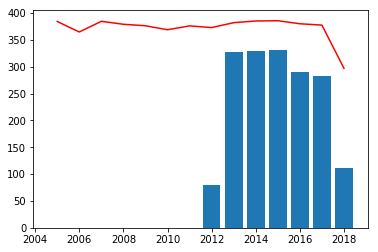

-------------------
Transit:  0209-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


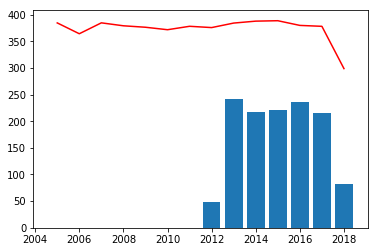

-------------------
Transit:  0212-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


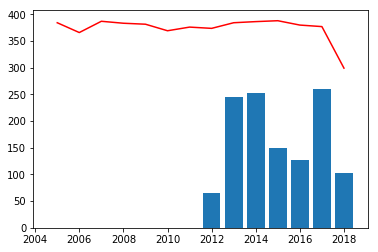

-------------------
Transit:  0239-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


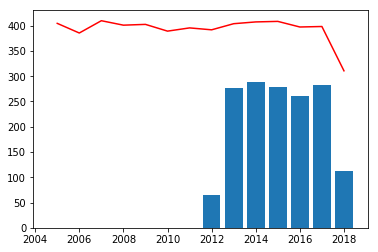

-------------------
Transit:  0267-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
2014   Mineur               Expertise
Name: TypeProjet, dtype: object


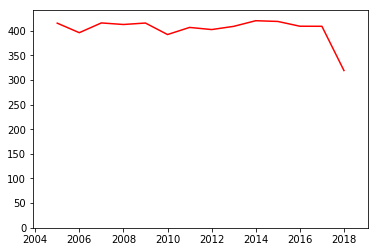

-------------------
Transit:  0283-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


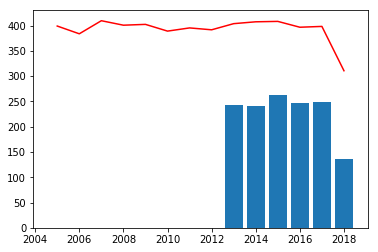

-------------------
Transit:  0303-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


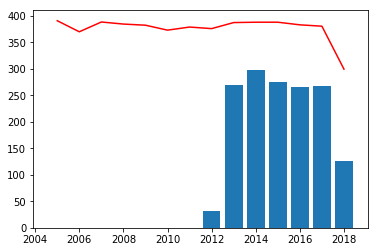

-------------------
Transit:  0319-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


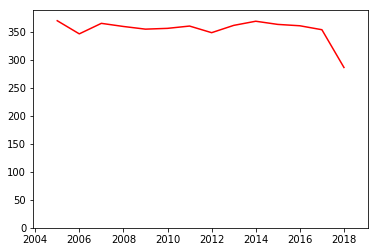

-------------------
Transit:  0322-1
Projet: 
Annee  ClasseProjet
2011   Majeur            Nouvelle succursale
2017   Mineur          Recommissioning (RCx)
Name: TypeProjet, dtype: object


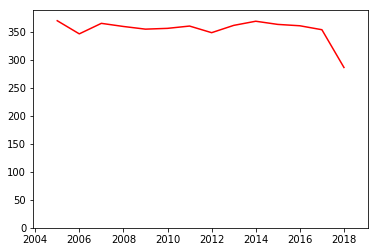

-------------------
Transit:  0325-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


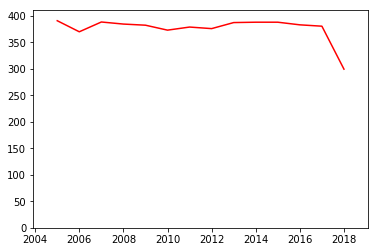

-------------------
Transit:  0359-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


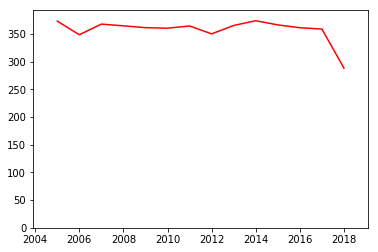

-------------------
Transit:  0363-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


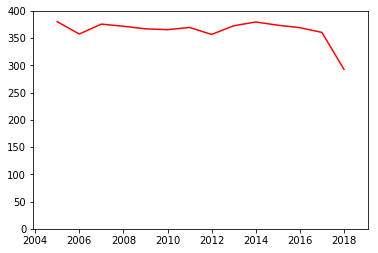

-------------------
Transit:  0402-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


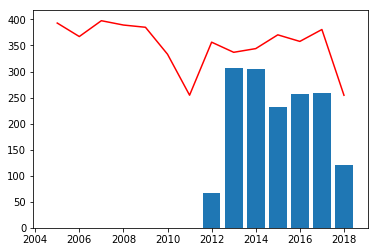

-------------------
Transit:  0416-1
Projet: 
Annee  ClasseProjet
2010   Mineur          Conversion de contrôles
2011   Majeur                    Réaménagement
Name: TypeProjet, dtype: object


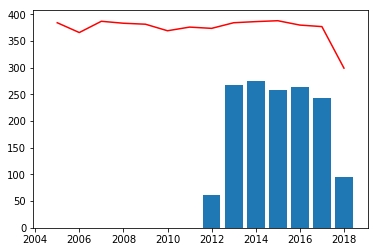

-------------------
Transit:  0461-1
Projet: 
Annee  ClasseProjet
2011   Majeur              Relocalisation
2015   Mineur          Améliorations CVCA
2018   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


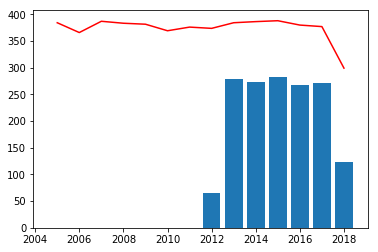

-------------------
Transit:  0559-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


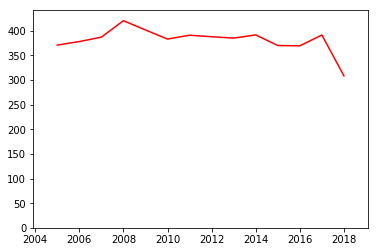

-------------------
Transit:  0770-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


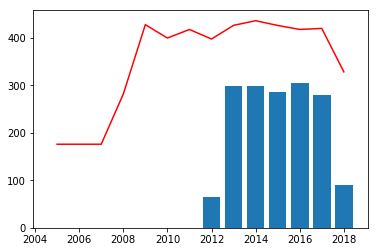

-------------------
Transit:  0870-1
Projet: 
Annee  ClasseProjet
2013   Mineur                    RCx complet
2011   Majeur                  Réaménagement
0      Mineur          Recommissioning (RCx)
Name: TypeProjet, dtype: object


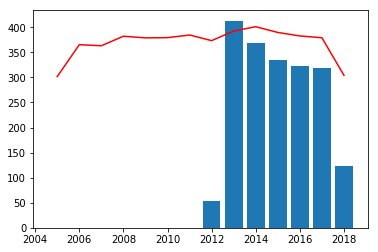

-------------------
Transit:  1036-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


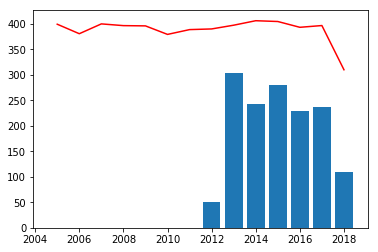

-------------------
Transit:  1050-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


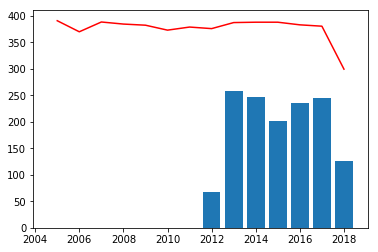

-------------------
Transit:  1068-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


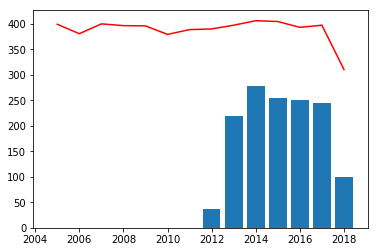

-------------------
Transit:  1084-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conv. contrôles et éclair.
2011   Majeur                      Relocalisation
Name: TypeProjet, dtype: object


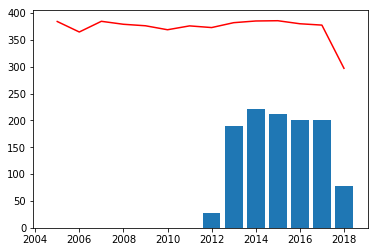

-------------------
Transit:  1097-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


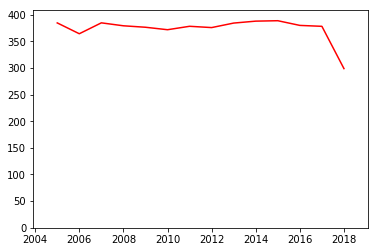

-------------------
Transit:  1150-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


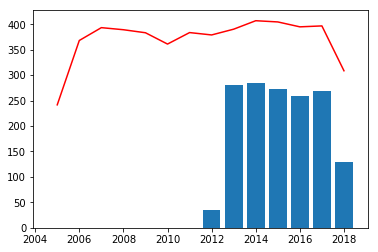

-------------------
Transit:  1171-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


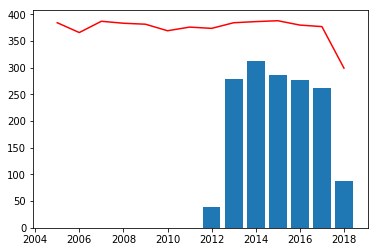

-------------------
Transit:  1173-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


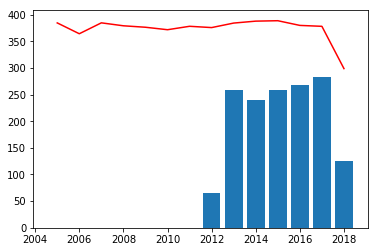

-------------------
Transit:  1194-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


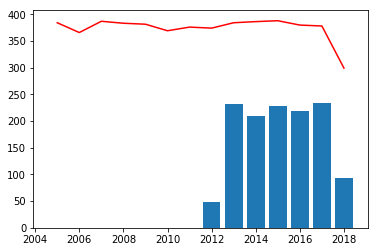

-------------------
Transit:  1224-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


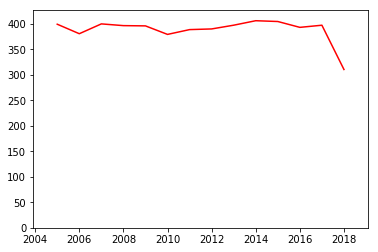

-------------------
Transit:  1225-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


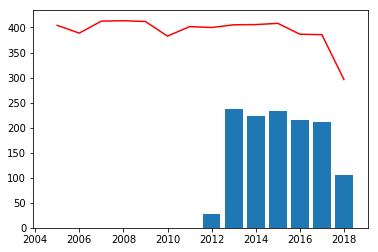

-------------------
Transit:  1281-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


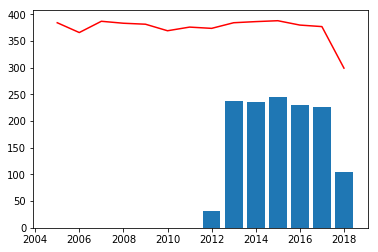

-------------------
Transit:  1331-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Réaménagement
Name: TypeProjet, dtype: object


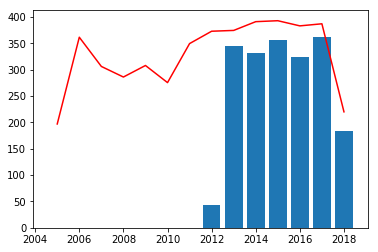

-------------------
Transit:  1358-1
Projet: 
Annee  ClasseProjet
2011   Majeur           Relocalisation
2017   Mineur          Correctifs CVCA
Name: TypeProjet, dtype: object


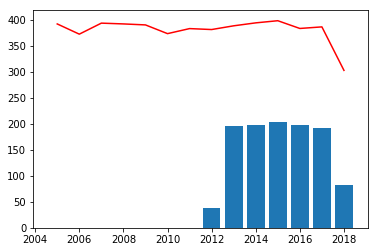

-------------------
Transit:  1384-1
Projet: 
Annee  ClasseProjet
2011   Majeur          Relocalisation
Name: TypeProjet, dtype: object


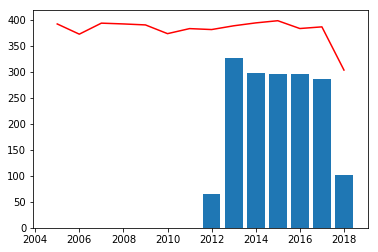

-------------------
Transit:  0030-1
Projet: 
Annee  ClasseProjet
2010   Mineur                  RCx Distech
2008   Majeur          Nouvelle succursale
2012   Majeur               Relocalisation
Name: TypeProjet, dtype: object


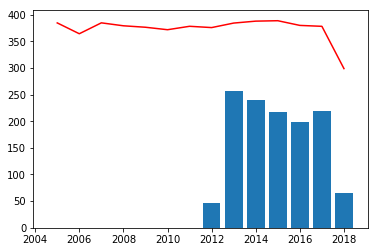

-------------------
Transit:  0318-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


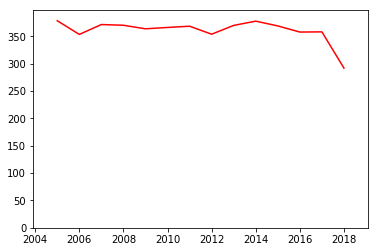

-------------------
Transit:  0320-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


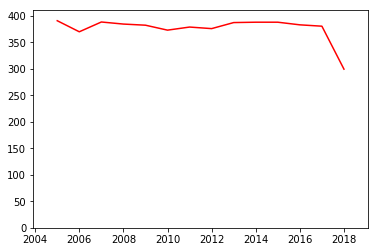

-------------------
Transit:  0346-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Relocalisation
Name: TypeProjet, dtype: object


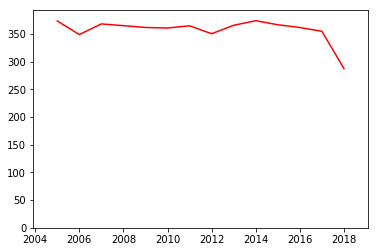

-------------------
Transit:  0873-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Relocalisation
Name: TypeProjet, dtype: object


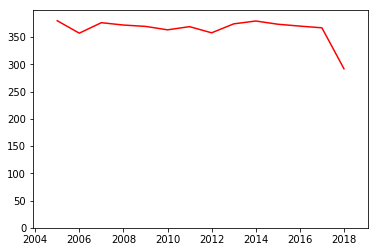

-------------------
Transit:  0607-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Relocalisation
Name: TypeProjet, dtype: object


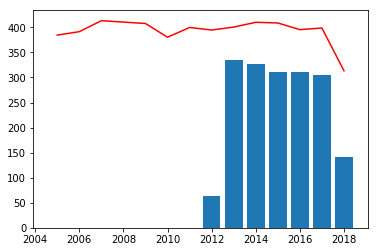

-------------------
Transit:  1070-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Relocalisation
Name: TypeProjet, dtype: object


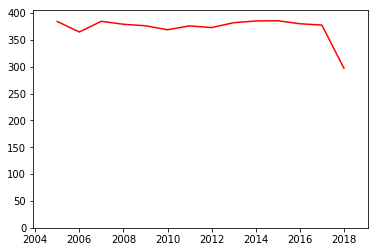

-------------------
Transit:  1064-1
Projet: 
Annee  ClasseProjet
2012   Majeur               Réaménagement
2016   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


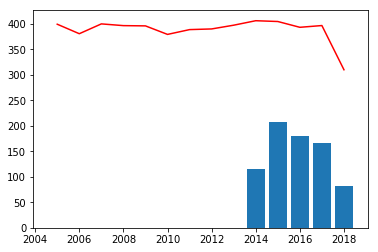

-------------------
Transit:  1072-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Relocalisation
Name: TypeProjet, dtype: object


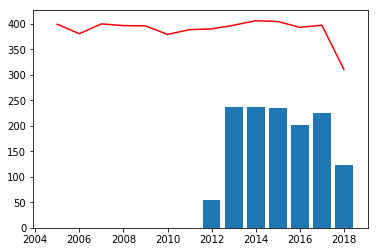

-------------------
Transit:  1110-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


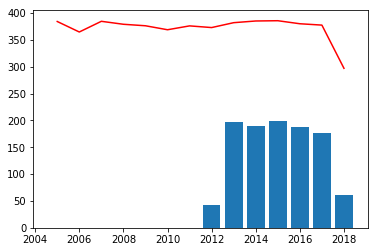

-------------------
Transit:  1135-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Relocalisation
Name: TypeProjet, dtype: object


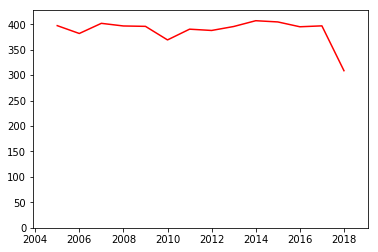

-------------------
Transit:  1161-1
Projet: 
Annee  ClasseProjet
2013   Mineur                   RCx allégé
2012   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


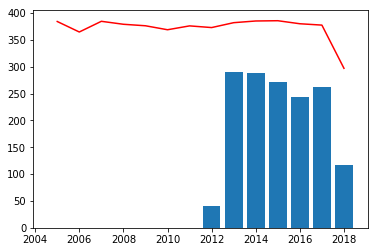

-------------------
Transit:  1179-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


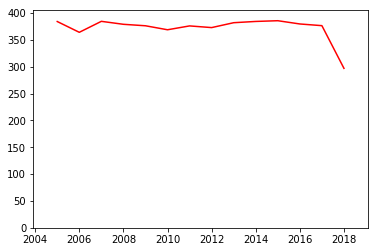

-------------------
Transit:  1195-1
Projet: 
Annee  ClasseProjet
2012   Majeur          Réaménagement
Name: TypeProjet, dtype: object


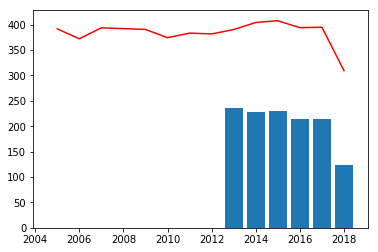

-------------------
Transit:  0050-1
Projet: 
Annee  ClasseProjet
2013   Majeur              Relocalisation
2017   Mineur          Améliorations CVCA
2016   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


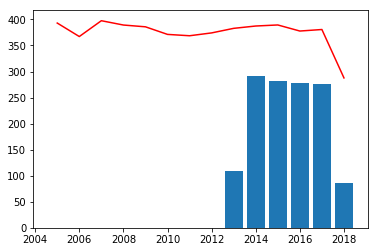

-------------------
Transit:  0053-1
Projet: 
Annee  ClasseProjet
2013   Majeur          Relocalisation
Name: TypeProjet, dtype: object


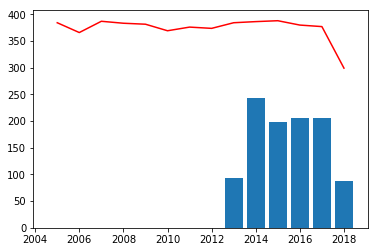

-------------------
Transit:  0182-1
Projet: 
Annee  ClasseProjet
2009   Mineur          Intégration Johnson
2013   Majeur               Relocalisation
Name: TypeProjet, dtype: object


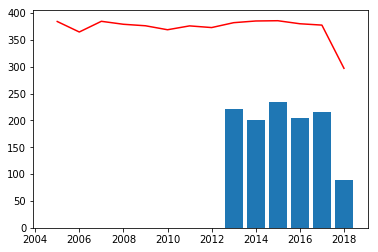

-------------------
Transit:  0434-1
Projet: 
Annee  ClasseProjet
2013   Majeur          Nouvelle succursale
Name: TypeProjet, dtype: object


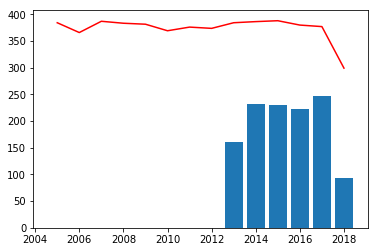

-------------------
Transit:  0602-1
Projet: 
Annee  ClasseProjet
2013   Majeur          Relocalisation
Name: TypeProjet, dtype: object


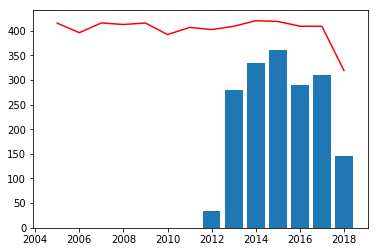

-------------------
Transit:  1188-1
Projet: 
Annee  ClasseProjet
2013   Majeur              Relocalisation
2015   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


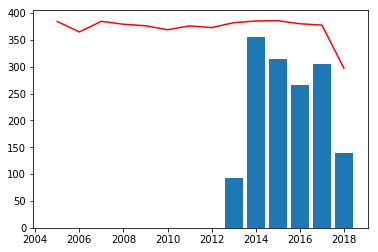

-------------------
Transit:  1323-1
Projet: 
Annee  ClasseProjet
2013   Majeur          Relocalisation
Name: TypeProjet, dtype: object


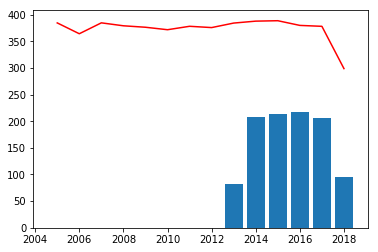

-------------------
Transit:  1373-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Conversion de contrôles
2010   Mineur                      RCx Distech
2013   Majeur                   Relocalisation
Name: TypeProjet, dtype: object


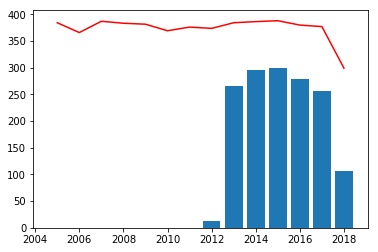

-------------------
Transit:  1393-1
Projet: 
Annee  ClasseProjet
2013   Majeur          Relocalisation
Name: TypeProjet, dtype: object


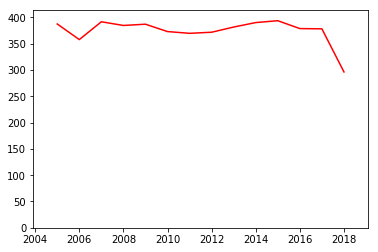

-------------------
Transit:  1421-1
Projet: 
Annee  ClasseProjet
2013   Majeur              Relocalisation
2015   Mineur          Améliorations CVCA
Name: TypeProjet, dtype: object


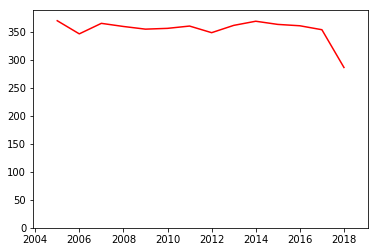

-------------------
Transit:  1236-1
Projet: 
Annee  ClasseProjet
2014   Majeur            Relocalisation
       Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


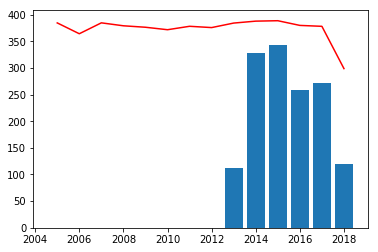

-------------------
Transit:  1237-1
Projet: 
Annee  ClasseProjet
2014   Majeur                Relocalisation
       Majeur              Cx projet majeur
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


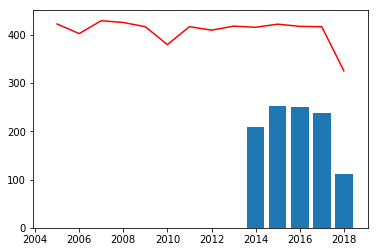

-------------------
Transit:  1203-1
Projet: 
Annee  ClasseProjet
2015   Majeur          Majeur - Reloc nouv. bât.
2016   Mineur                          Expertise
2017   Mineur                     Projet spécial
       Mineur                    Correctifs CVCA
Name: TypeProjet, dtype: object


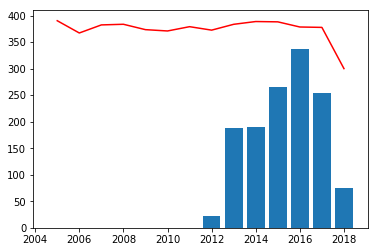

-------------------
Transit:  0443-1
Projet: 
Annee  ClasseProjet
2009   Mineur            Conversion de contrôles
2015   Majeur          Majeur - Reloc nouv. bât.
Name: TypeProjet, dtype: object


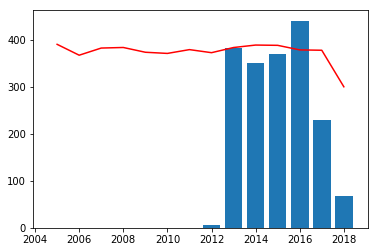

-------------------
Transit:  1101-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Majeur - Réduction
Name: TypeProjet, dtype: object


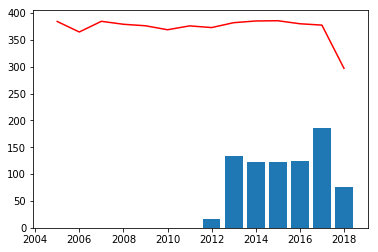

-------------------
Transit:  0275-1
Projet: 
Annee  ClasseProjet
2015   Majeur          Majeur - Nouvelle succursale
Name: TypeProjet, dtype: object


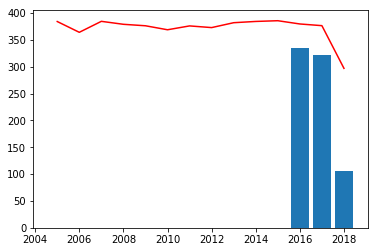

-------------------
Transit:  1096-1
Projet: 
Annee  ClasseProjet
2015   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object


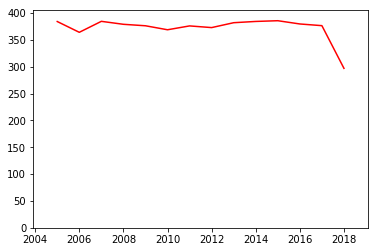

-------------------
Transit:  0025-1
Projet: 
Annee  ClasseProjet
2015   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


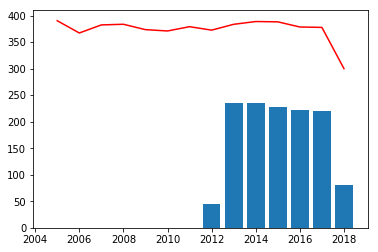

-------------------
Transit:  1300-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


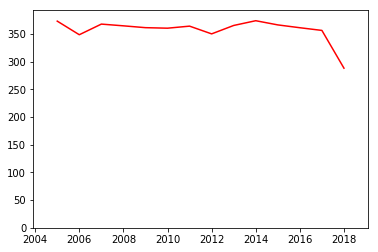

-------------------
Transit:  8570-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


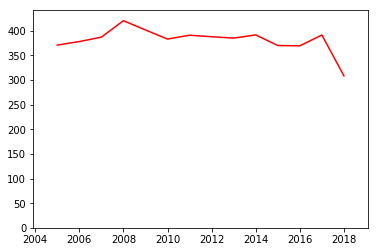

-------------------
Transit:  0235-1
Projet: 
Annee  ClasseProjet
2008   Mineur          Conv. contrôles et éclair.
2017   Majeur              Majeur - Réaménagement
Name: TypeProjet, dtype: object


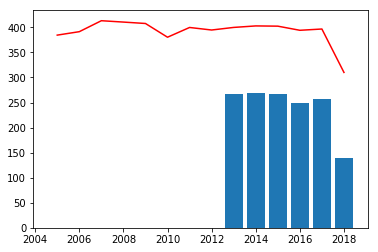

-------------------
Transit:  1108-1
Projet: 
Annee  ClasseProjet
2016   Majeur            Majeur - Réaménagement
2015   Mineur          Remplacement équip. CVCA
Name: TypeProjet, dtype: object


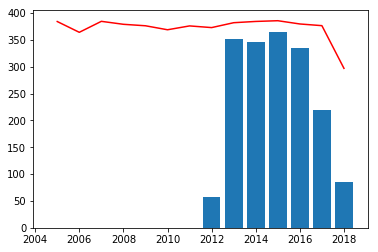

-------------------
Transit:  1109-1
Projet: 
Annee  ClasseProjet
2010   Mineur          Modernisation éclairage
2016   Majeur               Majeur - Réduction
Name: TypeProjet, dtype: object


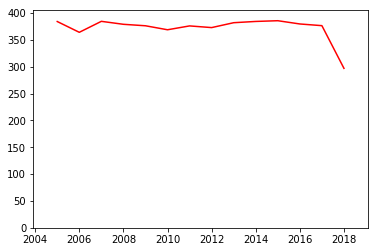

-------------------
Transit:  0503-1
Projet: 
Annee  ClasseProjet
2013   Mineur          Modernisation éclairage
2017   Majeur                 Cx projet majeur
Name: TypeProjet, dtype: object


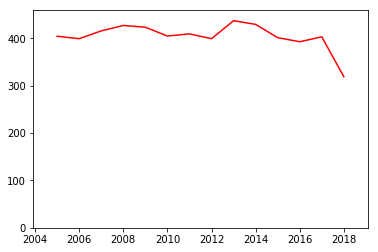

-------------------
Transit:  0044-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Réduction
Name: TypeProjet, dtype: object


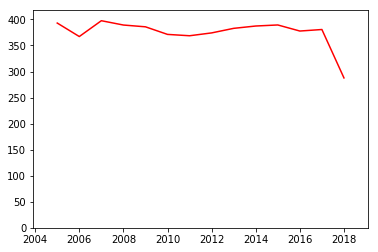

-------------------
Transit:  0159-1
Projet: 
Annee  ClasseProjet
2010   Mineur          Étanchéité et chaufferie
2012   Mineur           Réfection CVCA et Ctrls
2017   Majeur                Majeur - Réduction
2015   Mineur                Améliorations CVCA
Name: TypeProjet, dtype: object


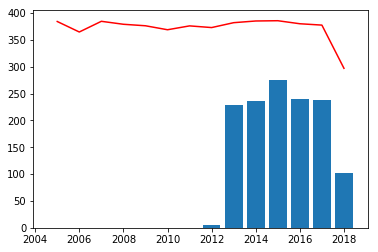

-------------------
Transit:  1216-1
Projet: 
Annee  ClasseProjet
2015   Majeur          Majeur - Reloc nouv. bât.
Name: TypeProjet, dtype: object


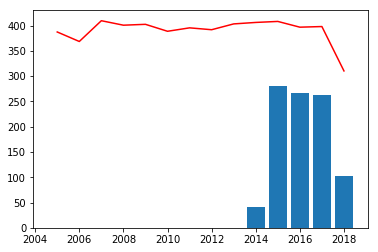

-------------------
Transit:  0652-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


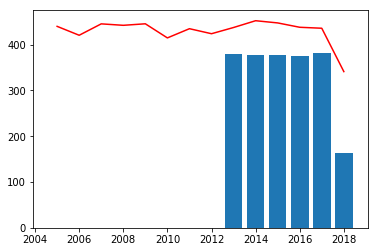

-------------------
Transit:  1174-1
Projet: 
Annee  ClasseProjet
R      Majeur          Majeur - Réduction
Name: TypeProjet, dtype: object


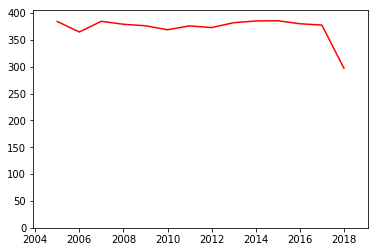

-------------------
Transit:  1235-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Réduction
Name: TypeProjet, dtype: object


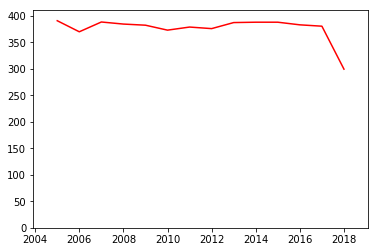

-------------------
Transit:  1362-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


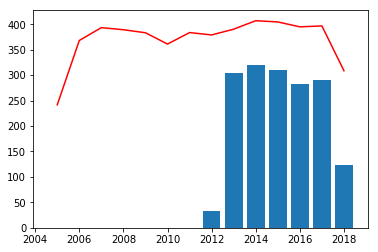

-------------------
Transit:  1314-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Majeur - Reloc nouv. bât.
2015   Mineur                 Améliorations CVCA
Name: TypeProjet, dtype: object


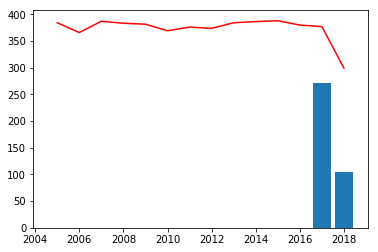

-------------------
Transit:  1443-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


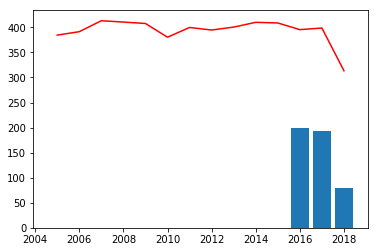

-------------------
Transit:  0231-1
Projet: 
Annee  ClasseProjet
2010   Mineur                             Plan B
2016   Majeur          Majeur - Reloc nouv. bât.
Name: TypeProjet, dtype: object


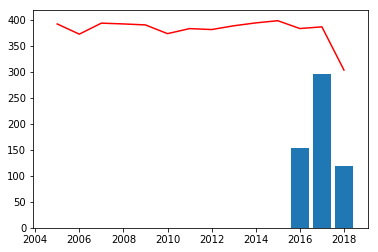

-------------------
Transit:  1177-1
Projet: 
Annee  ClasseProjet
2008   Mineur            Mise à niveau de contrôles
2016   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object


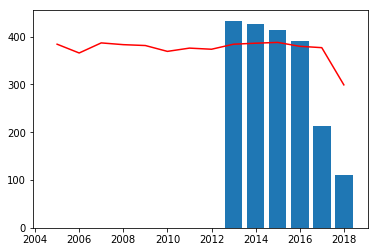

-------------------
Transit:  1389-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Majeur - Reloc nouv. bât.
Name: TypeProjet, dtype: object


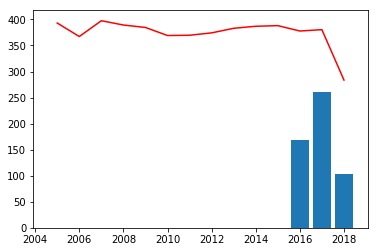

-------------------
Transit:  1207-1
Projet: 
Annee  ClasseProjet
2015   Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


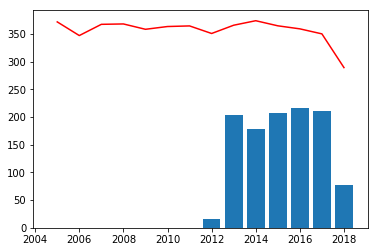

-------------------
Transit:  1327-1
Projet: 
Annee  ClasseProjet
2011   Mineur              Contrôles et biomasse
2016   Majeur          Majeur - Reloc nouv. bât.
       Mineur                     Projet spécial
Name: TypeProjet, dtype: object


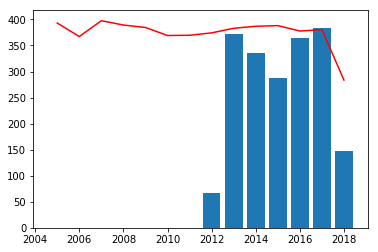

-------------------
Transit:  0632-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object


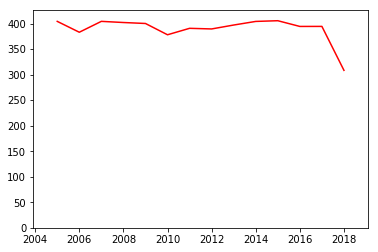

-------------------
Transit:  1476-1
Projet: 
Annee  ClasseProjet
2016   Majeur          Majeur - Nouvelle succursale
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1231-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object


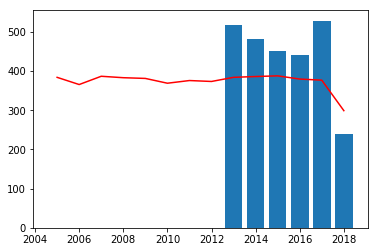

-------------------
Transit:  1237-1
Projet: 
Annee  ClasseProjet
2014   Majeur                Relocalisation
       Majeur              Cx projet majeur
2015   Mineur          Réaménagement mineur
Name: TypeProjet, dtype: object


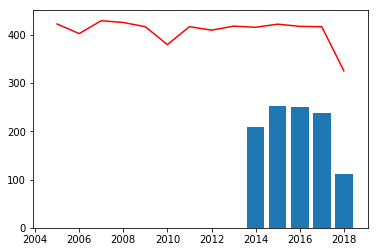

-------------------
Transit:  1236-1
Projet: 
Annee  ClasseProjet
2014   Majeur            Relocalisation
       Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


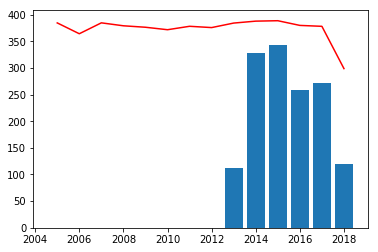

-------------------
Transit:  1217-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Nouvelle succursale
Name: TypeProjet, dtype: object


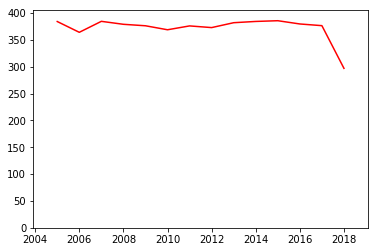

-------------------
Transit:  0276-1
Projet: 
Annee  ClasseProjet
2007   Mineur          Mise à niveau de contrôles
2011   Mineur                 Intégration Distech
2017   Majeur                  Majeur - Réduction
Name: TypeProjet, dtype: object


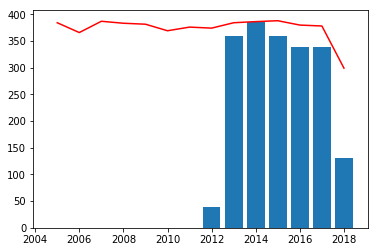

-------------------
Transit:  1032-1
Projet: 
Annee  ClasseProjet
2009   Mineur          Conversion de contrôles
2017   Majeur               Majeur - Réduction
Name: TypeProjet, dtype: object


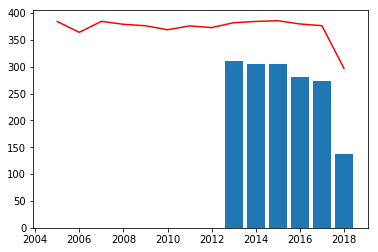

-------------------
Transit:  0201-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Reloc nouv. bât.
2018   Mineur               Réaménagement mineur
Name: TypeProjet, dtype: object


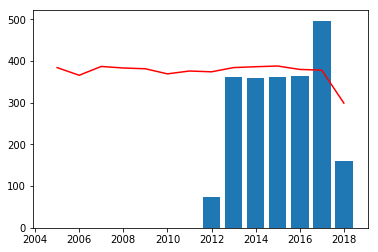

-------------------
Transit:  7147-1
Projet: 
Annee  ClasseProjet
2017   Mineur                        Projet spécial
2018   Majeur          Majeur - Nouvelle succursale
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1187-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Réfection CVCA et contrôles
2017   Majeur                   Majeur - Réduction
Name: TypeProjet, dtype: object


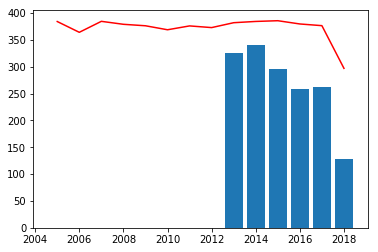

-------------------
Transit:  1023-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object


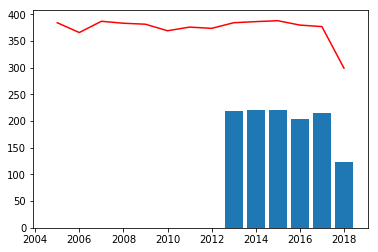

-------------------
Transit:  7322-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Reloc bât. existant
Name: TypeProjet, dtype: object
Pas de factures
-------------------
Transit:  1155-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


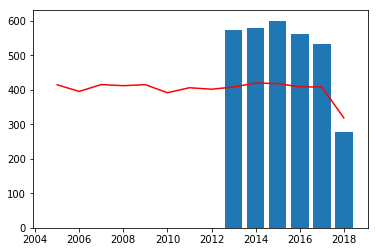

-------------------
Transit:  0240-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Reloc nouv. bât.
Name: TypeProjet, dtype: object


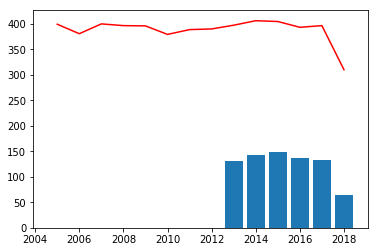

-------------------
Transit:  0428-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


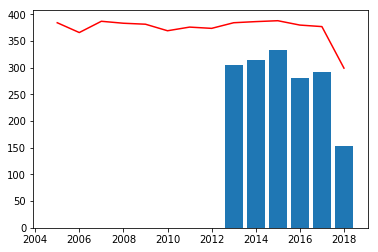

-------------------
Transit:  1075-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


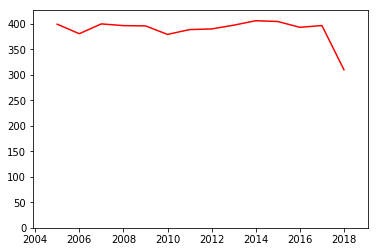

-------------------
Transit:  1322-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Cx projet majeur
Name: TypeProjet, dtype: object


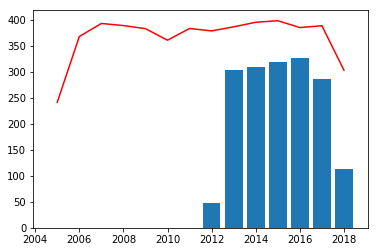

-------------------
Transit:  1166-1
Projet: 
Annee  ClasseProjet
2015   Mineur          Optimisation contrôles exist.
2017   Majeur                 Majeur - Réaménagement
Name: TypeProjet, dtype: object


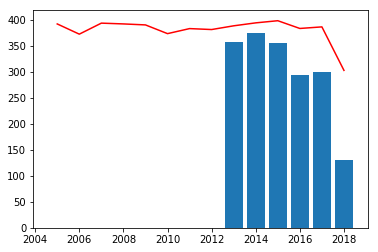

-------------------
Transit:  1080-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Réduction
Name: TypeProjet, dtype: object


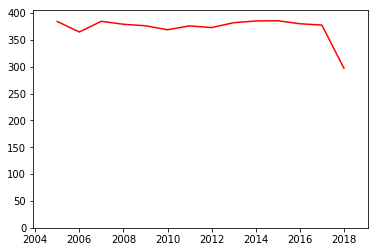

-------------------
Transit:  1042-1
Projet: 
Annee  ClasseProjet
2017   Majeur          Majeur - Réduction
Name: TypeProjet, dtype: object


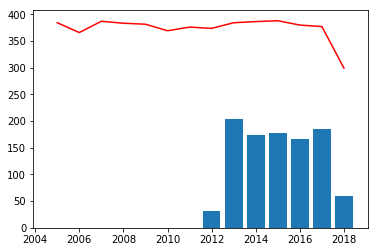

-------------------
Transit:  1385-1
Projet: 
Annee  ClasseProjet
2009   Mineur          Modernisation éclairage
2018   Majeur           Majeur - Réaménagement
Name: TypeProjet, dtype: object


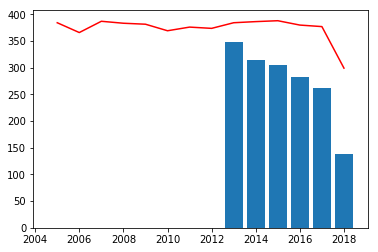

-------------------
Transit:  0624-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


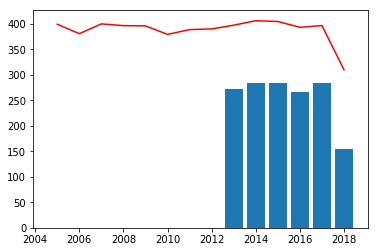

-------------------
Transit:  0311-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


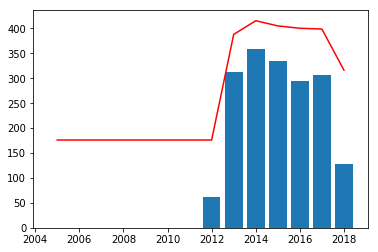

-------------------
Transit:  0324-1
Projet: 
Annee  ClasseProjet
2018   Majeur          Majeur - Réaménagement
Name: TypeProjet, dtype: object


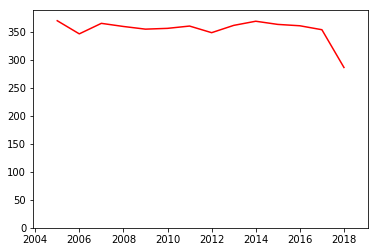

-------------------


In [17]:
listMajeurs = df_projets.xs('Majeur', level=2).index.get_level_values(0).tolist()

for transit in listMajeurs:
    print('Transit: ',transit)
    #print('Superficie (m2): ',df_succursales.loc[transit]['superficie_m2'])
    print('Projet: ')
    try:
        print(df_projets.loc[transit]['TypeProjet'])
        plt.plot(df_annee.loc[transit]['Consommation_norm_DJ'].index,
        df_annee.loc[transit]['Consommation_norm_DJ'],color='red')
        plt.bar(df_annee.loc[transit]['Consommation_kWh_eq_m2'].index,
        df_annee.loc[transit]['Consommation_kWh_eq_m2'])
        plt.show()
        print('-------------------')
    except:
        print('Pas de factures')
        print('-------------------')